So let's start our journey into mistery

In [1]:
!pip install pybiomart
!pip install PyWGCNA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 871.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 869.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.9/748.9 kB 42.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00
  Created wheel for PyWGCNA: filename=PyWGCNA-2.0.4-py3-none-any.whl size=54166 sha256=5dd0a00f70c83d05ac5bfc1b0a9c38c91773eb7a609fd39991ca53e7b459cbfc
  Stored in directory: /root/.cache/pip/wheels/15/bb/75/102a330fa7b0fcb4685ed817477cae84484809cd357205fc72
  Created w

In [2]:
from pybiomart import Server
import PyWGCNA
import pandas as pd
import numpy as np


Let's use meth file from our jupyter notebook because it's the only right way just trust me

In [207]:
methData = pd.read_csv("methData.csv")

In [3]:
!pip install biomart
import biomart

In [208]:
methData.head()

chr    start      end strand  coverage1  numCs1  numTs1  coverage2  \
0  chr1  3020877  3020877      *         40      37       3         24   
1  chr1  3020891  3020891      *         40      35       5         24   
2  chr1  3020946  3020946      *         48      25      23         35   
3  chr1  3037802  3037802      *         16      15       1         29   
4  chr1  3037820  3037820      *         16      13       3         29   

   numCs2  numTs2  ...  numTs3  coverage4  numCs4  numTs4  coverage5  numCs5  \
0      22       2  ...       0         35      35       0         22      22   
1      23       1  ...       3         35      31       4         22      22   
2      23      12  ...       8         48      37      11         35      35   
3      26       3  ...       0         12      12       0         33      32   
4      22       7  ...       3         12       8       4         33      31   

   numTs5  coverage6  numCs6  numTs6  
0       0         24      22       2  
1       0         24      23       1  
2       0         57      51       6  
3       1         37      31       6  
4       2         37      31       6  

[5 rows x 22 columns]

looks like everything is fine as it is supposed to be

In [209]:
methData['chr'] = methData['chr'].str.replace('chr', '')

this was needed for proper functioning of biomart

In [210]:
methData.head()

chr    start      end strand  coverage1  numCs1  numTs1  coverage2  numCs2  \
0   1  3020877  3020877      *         40      37       3         24      22   
1   1  3020891  3020891      *         40      35       5         24      23   
2   1  3020946  3020946      *         48      25      23         35      23   
3   1  3037802  3037802      *         16      15       1         29      26   
4   1  3037820  3037820      *         16      13       3         29      22   

   numTs2  ...  numTs3  coverage4  numCs4  numTs4  coverage5  numCs5  numTs5  \
0       2  ...       0         35      35       0         22      22       0   
1       1  ...       3         35      31       4         22      22       0   
2      12  ...       8         48      37      11         35      35       0   
3       3  ...       0         12      12       0         33      32       1   
4       7  ...       3         12       8       4         33      31       2   

   coverage6  numCs6  numTs6  
0         24      22       2  
1         24      23       1  
2         57      51       6  
3         37      31       6  
4         37      31       6  

[5 rows x 22 columns]

let's calculate metlev by dividing methylated Cs over all methylated cites just because we can

In [211]:
methData['genenumber'] = methData.reset_index().index
methData['GSM4099306'] = methData['numCs1']/(methData['numCs1'] + methData['numTs1'])
methData['GSM4099310'] = methData['numCs2']/(methData['numCs2'] + methData['numTs2'])
methData['GSM4099314'] = methData['numCs3']/(methData['numCs3'] + methData['numTs3'])
methData['GSM4099307'] = methData['numCs4']/(methData['numCs4'] + methData['numTs4'])
methData['GSM4099311'] = methData['numCs5']/(methData['numCs5'] + methData['numTs5'])
methData['GSM4099315'] = methData['numCs6']/(methData['numCs6'] + methData['numTs6'])

In [212]:
methData.head()

chr    start      end strand  coverage1  numCs1  numTs1  coverage2  numCs2  \
0   1  3020877  3020877      *         40      37       3         24      22   
1   1  3020891  3020891      *         40      35       5         24      23   
2   1  3020946  3020946      *         48      25      23         35      23   
3   1  3037802  3037802      *         16      15       1         29      26   
4   1  3037820  3037820      *         16      13       3         29      22   

   numTs2  ...  coverage6  numCs6  numTs6  genenumber  GSM4099306  GSM4099310  \
0       2  ...         24      22       2           0    0.925000    0.916667   
1       1  ...         24      23       1           1    0.875000    0.958333   
2      12  ...         57      51       6           2    0.520833    0.657143   
3       3  ...         37      31       6           3    0.937500    0.896552   
4       7  ...         37      31       6           4    0.812500    0.758621   

   GSM4099314  GSM4099307  GSM4099311  GSM4099315  
0    1.000000    1.000000    1.000000    0.916667  
1    0.833333    0.885714    1.000000    0.958333  
2    0.680000    0.770833    1.000000    0.894737  
3    1.000000    1.000000    0.969697    0.837838  
4    0.875000    0.666667    0.939394    0.837838  

[5 rows x 29 columns]

let's focus on first ten chromosomes because first of all there are some odd ones that i don't want to deal with when we get to biomart and secondly i don't have a supercomputer lomonosov so we are extremely limited by resources

In [213]:
chromosomes_to_keep = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
sampled_meth = methData[methData['chr'].isin(chromosomes_to_keep)]

In [214]:
sampled_meth['chr'].unique()

array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [215]:
sampled_meth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448564 entries, 0 to 731455
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   chr         448564 non-null  object 
 1   start       448564 non-null  int64  
 2   end         448564 non-null  int64  
 3   strand      448564 non-null  object 
 4   coverage1   448564 non-null  int64  
 5   numCs1      448564 non-null  int64  
 6   numTs1      448564 non-null  int64  
 7   coverage2   448564 non-null  int64  
 8   numCs2      448564 non-null  int64  
 9   numTs2      448564 non-null  int64  
 10  coverage3   448564 non-null  int64  
 11  numCs3      448564 non-null  int64  
 12  numTs3      448564 non-null  int64  
 13  coverage4   448564 non-null  int64  
 14  numCs4      448564 non-null  int64  
 15  numTs4      448564 non-null  int64  
 16  coverage5   448564 non-null  int64  
 17  numCs5      448564 non-null  int64  
 18  numTs5      448564 non-null  int64  
 19  coverag

out of those let's subsample 100000 genes

In [216]:
sampled_meth = sampled_meth.sample(n=100000, axis=0)
sampled_meth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 544610 to 665412
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   chr         100000 non-null  object 
 1   start       100000 non-null  int64  
 2   end         100000 non-null  int64  
 3   strand      100000 non-null  object 
 4   coverage1   100000 non-null  int64  
 5   numCs1      100000 non-null  int64  
 6   numTs1      100000 non-null  int64  
 7   coverage2   100000 non-null  int64  
 8   numCs2      100000 non-null  int64  
 9   numTs2      100000 non-null  int64  
 10  coverage3   100000 non-null  int64  
 11  numCs3      100000 non-null  int64  
 12  numTs3      100000 non-null  int64  
 13  coverage4   100000 non-null  int64  
 14  numCs4      100000 non-null  int64  
 15  numTs4      100000 non-null  int64  
 16  coverage5   100000 non-null  int64  
 17  numCs5      100000 non-null  int64  
 18  numTs5      100000 non-null  int64  
 19  co

# NOW THE FUN PART BEGINS

Let's make a gene list using biomart

In [232]:
archive_url = 'http://jul2019.archive.ensembl.org/biomart'
server = biomart.BiomartServer(archive_url)

# Mus musculus dataset
mart = server.datasets['mmusculus_gene_ensembl']

attributes =  ['ensembl_gene_id', 'chromosome_name', 'start_position', 'end_position', 'strand', 'gene_biotype', 'mgi_symbol']
response = mart.search({'attributes': attributes})

data = response.raw.data.decode('ascii')

genes_trascripts_df = pd.DataFrame(data.splitlines())
genes_trascripts_df[attributes] = genes_trascripts_df[0].str.split('\t', expand=True)
genes_trascripts_df.drop(0, axis=1, inplace=True)

genes_trascripts_df.head(5)


#meth_upd = pd.merge(sampled_meth, genes_trascripts_df, left_on=['chr', 'start', 'end', 'strand'], right_on=['chromosome_name', 'start_position', 'end_position', 'strand'])

ensembl_gene_id chromosome_name start_position end_position strand  \
0  ENSMUSG00000064336              MT              1           68      1   
1  ENSMUSG00000064337              MT             70         1024      1   
2  ENSMUSG00000064338              MT           1025         1093      1   
3  ENSMUSG00000064339              MT           1094         2675      1   
4  ENSMUSG00000064340              MT           2676         2750      1   

  gene_biotype mgi_symbol  
0      Mt_tRNA      mt-Tf  
1      Mt_rRNA    mt-Rnr1  
2      Mt_tRNA      mt-Tv  
3      Mt_rRNA    mt-Rnr2  
4      Mt_tRNA     mt-Tl1

In [233]:
genes_trascripts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56399 entries, 0 to 56398
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ensembl_gene_id  56399 non-null  object
 1   chromosome_name  56399 non-null  object
 2   start_position   56399 non-null  object
 3   end_position     56399 non-null  object
 4   strand           56399 non-null  object
 5   gene_biotype     56399 non-null  object
 6   mgi_symbol       56399 non-null  object
dtypes: object(7)
memory usage: 3.0+ MB


In [234]:
sampled_meth['strand'].unique()

array(['*'], dtype=object)

In [235]:
genes_trascripts_df['start_position'].unique()

array(['1', '70', '1025', ..., '4074378', '4125987', '18482942'],
      dtype=object)

In [236]:
genes_trascripts_df['start_position'] = genes_trascripts_df['start_position'].astype('int64')
genes_trascripts_df['end_position'] = genes_trascripts_df['end_position'].astype('int64')

In [237]:
genes_trascripts_df['start_position'].unique()

array([       1,       70,     1025, ...,  4074378,  4125987, 18482942])

In [239]:
genes_trascripts_df['mgi_symbol'].nunique()

54564

Manual granges basically \\
I know that you can use pyranges for that but when i found out it was already too late and I've spent too much time on this thing for 2 additional points like ive wasted whole weekend over this

In [240]:

def find_nearest_gene(row, genes_df):

    start_diff = abs(genes_df['start_position'] - row['start'])
    end_diff = abs(genes_df['end_position'] - row['end'])

    total_diff = start_diff + end_diff

    nearest_gene_idx = total_diff.idxmin()
    nearest_gene_ensembl_id = genes_df.loc[nearest_gene_idx, 'ensembl_gene_id']
    nearest_gene_biotype = genes_df.loc[nearest_gene_idx, 'gene_biotype']
    nearest_gene_name = genes_df.loc[nearest_gene_idx, 'mgi_symbol']

    return nearest_gene_ensembl_id, nearest_gene_biotype, nearest_gene_name


methData[['nearest_gene_ensembl_id', 'nearest_gene_biotype', 'gene_name']] = methData.apply(lambda row: find_nearest_gene(row, genes_trascripts_df), axis=1, result_type='expand')
methData.head(20)


chr    start      end strand  coverage1  numCs1  numTs1  coverage2  numCs2  \
0    1  3020877  3020877      *         40      37       3         24      22   
1    1  3020891  3020891      *         40      35       5         24      23   
2    1  3020946  3020946      *         48      25      23         35      23   
3    1  3037802  3037802      *         16      15       1         29      26   
4    1  3037820  3037820      *         16      13       3         29      22   
5    1  3037825  3037825      *         16      16       0         29      28   
6    1  3037827  3037827      *         16      15       1         29      22   
7    1  3037845  3037845      *         16      16       0         29      27   
8    1  3301900  3301900      *         21      21       0         34      34   
9    1  3301941  3301941      *         21      18       3         34      33   
10   1  3337055  3337055      *         14      12       2         38      30   
11   1  3337153  3337153      *         17      17       0         44      44   
12   1  3622136  3622136      *         75      64      11         72      67   
13   1  3622217  3622217      *         87      82       5         69      67   
14   1  3622256  3622256      *         25      19       6         39      35   
15   1  3622257  3622257      *         87      87       0         69      67   
16   1  3622311  3622311      *         31      31       0         40      39   
17   1  3622340  3622340      *         16      16       0         17      17   
18   1  3622341  3622341      *         31      31       0         40      37   
19   1  3670645  3670645      *         20       0      20         53       0   

    numTs2  ...  genenumber  GSM4099306  GSM4099310  GSM4099314  GSM4099307  \
0        2  ...           0    0.925000    0.916667    1.000000    1.000000   
1        1  ...           1    0.875000    0.958333    0.833333    0.885714   
2       12  ...           2    0.520833    0.657143    0.680000    0.770833   
3        3  ...           3    0.937500    0.896552    1.000000    1.000000   
4        7  ...           4    0.812500    0.758621    0.875000    0.666667   
5        1  ...           5    1.000000    0.965517    0.958333    1.000000   
6        7  ...           6    0.937500    0.758621    0.750000    0.583333   
7        2  ...           7    1.000000    0.931034    0.958333    1.000000   
8        0  ...           8    1.000000    1.000000    0.939394    1.000000   
9        1  ...           9    0.857143    0.970588    0.878788    1.000000   
10       8  ...          10    0.857143    0.789474    0.928571    1.000000   
11       0  ...          11    1.000000    1.000000    0.961538    1.000000   
12       5  ...          12    0.853333    0.930556    0.936170    1.000000   
13       2  ...          13    0.942529    0.971014    0.912281    1.000000   
14       4  ...          14    0.760000    0.897436    1.000000    1.000000   
15       2  ...          15    1.000000    0.971014    0.982456    0.967391   
16       1  ...          16    1.000000    0.975000    1.000000    1.000000   
17       0  ...          17    1.000000    1.000000    0.800000    0.937500   
18       3  ...          18    1.000000    0.925000    0.962963    1.000000   
19      53  ...          19    0.000000    0.000000    0.020000    0.000000   

    GSM4099311  GSM4099315  nearest_gene_ensembl_id  nearest_gene_biotype  \
0     1.000000    0.916667       ENSMUSG00000095547        protein_coding   
1     1.000000    0.958333       ENSMUSG00000095547        protein_coding   
2     1.000000    0.894737       ENSMUSG00000095547        protein_coding   
3     0.969697    0.837838       ENSMUSG00000096201        protein_coding   
4     0.939394    0.837838       ENSMUSG00000096201        protein_coding   
5     1.000000    0.891892       ENSMUSG00000096201        protein_coding   
6     0.937500    0.810811       ENSMUSG00000096201        protein_coding   
7     1.000000    0.97297

In [241]:
methData.head(20)

chr    start      end strand  coverage1  numCs1  numTs1  coverage2  numCs2  \
0    1  3020877  3020877      *         40      37       3         24      22   
1    1  3020891  3020891      *         40      35       5         24      23   
2    1  3020946  3020946      *         48      25      23         35      23   
3    1  3037802  3037802      *         16      15       1         29      26   
4    1  3037820  3037820      *         16      13       3         29      22   
5    1  3037825  3037825      *         16      16       0         29      28   
6    1  3037827  3037827      *         16      15       1         29      22   
7    1  3037845  3037845      *         16      16       0         29      27   
8    1  3301900  3301900      *         21      21       0         34      34   
9    1  3301941  3301941      *         21      18       3         34      33   
10   1  3337055  3337055      *         14      12       2         38      30   
11   1  3337153  3337153      *         17      17       0         44      44   
12   1  3622136  3622136      *         75      64      11         72      67   
13   1  3622217  3622217      *         87      82       5         69      67   
14   1  3622256  3622256      *         25      19       6         39      35   
15   1  3622257  3622257      *         87      87       0         69      67   
16   1  3622311  3622311      *         31      31       0         40      39   
17   1  3622340  3622340      *         16      16       0         17      17   
18   1  3622341  3622341      *         31      31       0         40      37   
19   1  3670645  3670645      *         20       0      20         53       0   

    numTs2  ...  genenumber  GSM4099306  GSM4099310  GSM4099314  GSM4099307  \
0        2  ...           0    0.925000    0.916667    1.000000    1.000000   
1        1  ...           1    0.875000    0.958333    0.833333    0.885714   
2       12  ...           2    0.520833    0.657143    0.680000    0.770833   
3        3  ...           3    0.937500    0.896552    1.000000    1.000000   
4        7  ...           4    0.812500    0.758621    0.875000    0.666667   
5        1  ...           5    1.000000    0.965517    0.958333    1.000000   
6        7  ...           6    0.937500    0.758621    0.750000    0.583333   
7        2  ...           7    1.000000    0.931034    0.958333    1.000000   
8        0  ...           8    1.000000    1.000000    0.939394    1.000000   
9        1  ...           9    0.857143    0.970588    0.878788    1.000000   
10       8  ...          10    0.857143    0.789474    0.928571    1.000000   
11       0  ...          11    1.000000    1.000000    0.961538    1.000000   
12       5  ...          12    0.853333    0.930556    0.936170    1.000000   
13       2  ...          13    0.942529    0.971014    0.912281    1.000000   
14       4  ...          14    0.760000    0.897436    1.000000    1.000000   
15       2  ...          15    1.000000    0.971014    0.982456    0.967391   
16       1  ...          16    1.000000    0.975000    1.000000    1.000000   
17       0  ...          17    1.000000    1.000000    0.800000    0.937500   
18       3  ...          18    1.000000    0.925000    0.962963    1.000000   
19      53  ...          19    0.000000    0.000000    0.020000    0.000000   

    GSM4099311  GSM4099315  nearest_gene_ensembl_id  nearest_gene_biotype  \
0     1.000000    0.916667       ENSMUSG00000095547        protein_coding   
1     1.000000    0.958333       ENSMUSG00000095547        protein_coding   
2     1.000000    0.894737       ENSMUSG00000095547        protein_coding   
3     0.969697    0.837838       ENSMUSG00000096201        protein_coding   
4     0.939394    0.837838       ENSMUSG00000096201        protein_coding   
5     1.000000    0.891892       ENSMUSG00000096201        protein_coding   
6     0.937500    0.810811       ENSMUSG00000096201        protein_coding   
7     1.000000    0.97297

In [242]:
df = methData[['GSM4099306',	'GSM4099310',	'GSM4099314',	'GSM4099307',	'GSM4099311',	'GSM4099315', 'nearest_gene_ensembl_id', 'nearest_gene_biotype', 'gene_name']]
df.head()

GSM4099306  GSM4099310  GSM4099314  GSM4099307  GSM4099311  GSM4099315  \
0    0.925000    0.916667    1.000000    1.000000    1.000000    0.916667   
1    0.875000    0.958333    0.833333    0.885714    1.000000    0.958333   
2    0.520833    0.657143    0.680000    0.770833    1.000000    0.894737   
3    0.937500    0.896552    1.000000    1.000000    0.969697    0.837838   
4    0.812500    0.758621    0.875000    0.666667    0.939394    0.837838   

  nearest_gene_ensembl_id nearest_gene_biotype gene_name  
0      ENSMUSG00000095547       protein_coding   Gm10719  
1      ENSMUSG00000095547       protein_coding   Gm10719  
2      ENSMUSG00000095547       protein_coding   Gm10719  
3      ENSMUSG00000096201       protein_coding   Gm10715  
4      ENSMUSG00000096201       protein_coding   Gm10715

In [243]:
df['gene_name'].unique()

array(['Gm10719', 'Gm10715', 'Gm3749', ..., '4930535O05Rik',
       '1700031F10Rik', 'Gm43085'], dtype=object)

we need to make index out of ensembl id for wgcna to work properly

In [244]:
df1 = df
myindex = df1['nearest_gene_ensembl_id']
df1.index = myindex
df1.head(20)

GSM4099306  GSM4099310  GSM4099314  GSM4099307  \
nearest_gene_ensembl_id                                                   
ENSMUSG00000095547         0.925000    0.916667    1.000000    1.000000   
ENSMUSG00000095547         0.875000    0.958333    0.833333    0.885714   
ENSMUSG00000095547         0.520833    0.657143    0.680000    0.770833   
ENSMUSG00000096201         0.937500    0.896552    1.000000    1.000000   
ENSMUSG00000096201         0.812500    0.758621    0.875000    0.666667   
ENSMUSG00000096201         1.000000    0.965517    0.958333    1.000000   
ENSMUSG00000096201         0.937500    0.758621    0.750000    0.583333   
ENSMUSG00000096201         1.000000    0.931034    0.958333    1.000000   
ENSMUSG00000116388         1.000000    1.000000    0.939394    1.000000   
ENSMUSG00000116388         0.857143    0.970588    0.878788    1.000000   
ENSMUSG00000107620         0.857143    0.789474    0.928571    1.000000   
ENSMUSG00000107620         1.000000    1.000000    0.961538    1.000000   
ENSMUSG00000087687         0.853333    0.930556    0.936170    1.000000   
ENSMUSG00000087687         0.942529    0.971014    0.912281    1.000000   
ENSMUSG00000087687         0.760000    0.897436    1.000000    1.000000   
ENSMUSG00000087687         1.000000    0.971014    0.982456    0.967391   
ENSMUSG00000004630         1.000000    0.975000    1.000000    1.000000   
ENSMUSG00000004630         1.000000    1.000000    0.800000    0.937500   
ENSMUSG00000004630         1.000000    0.925000    0.962963    1.000000   
ENSMUSG00000089665         0.000000    0.000000    0.020000    0.000000   

                         GSM4099311  GSM4099315 nearest_gene_ensembl_id  \
nearest_gene_ensembl_id                                                   
ENSMUSG00000095547         1.000000    0.916667      ENSMUSG00000095547   
ENSMUSG00000095547         1.000000    0.958333      ENSMUSG00000095547   
ENSMUSG00000095547         1.000000    0.894737      ENSMUSG00000095547   
ENSMUSG00000096201         0.969697    0.837838      ENSMUSG00000096201   
ENSMUSG00000096201         0.939394    0.837838      ENSMUSG00000096201   
ENSMUSG00000096201         1.000000    0.891892      ENSMUSG00000096201   
ENSMUSG00000096201         0.937500    0.810811      ENSMUSG00000096201   
ENSMUSG00000096201         1.000000    0.972973      ENSMUSG00000096201   
ENSMUSG00000116388         0.967742    1.000000      ENSMUSG00000116388   
ENSMUSG00000116388         0.870968    0.947368      ENSMUSG00000116388   
ENSMUSG00000107620         0.875000    0.956522      ENSMUSG00000107620   
ENSMUSG00000107620         1.000000    0.965517      ENSMUSG00000107620   
ENSMUSG00000087687         1.000000    1.000000      ENSMUSG00000087687   
ENSMUSG00000087687         1.000000    0.981818      ENSMUSG00000087687   
ENSMUSG00000087687         0.984848    0.957447      ENSMUSG00000087687   
ENSMUSG00000087687         1.000000    1.000000      ENSMUSG00000087687   
ENSMUSG00000004630         0.980769    1.000000      ENSMUSG00000004630   
ENSMUSG00000004630         0.952381    0.941176      ENSMUSG00000004630   
ENSMUSG00000004630         0.961538    1.000000      ENSMUSG00000004630   
ENSMUSG00000089665         0.000000    0.000000      ENSMUSG00000089665   

                         nearest_gene_biotype gene_name  
nearest_gene_ensembl_id                                  
ENSMUSG00000095547             protein_coding   Gm10719  
ENSMUSG00000095547             protein_coding   Gm10719  
ENSMUSG00000095547             protein_coding   Gm10719  
ENSMUSG00000096201             protein_coding   Gm10715  
ENSMUSG00000096201             protein_coding   Gm10715  
ENSMUSG00000096201             protein_coding   Gm10715  
ENSMUSG00000096201             protein_coding   Gm10715  
ENSMUSG00000096201             protein_coding   Gm10715  
ENSMUSG00000116388       processed_pseudogene    Gm3749  
ENSMUSG00000116388       processed_pseudogene    Gm3749  
ENSMUSG00000107620         

In [245]:
df1 = df1[['GSM4099306',	'GSM4099310',	'GSM4099314',	'GSM4099307',	'GSM4099311',	'GSM4099315', 'nearest_gene_biotype', 'gene_name']]
df1.head()

GSM4099306  GSM4099310  GSM4099314  GSM4099307  \
nearest_gene_ensembl_id                                                   
ENSMUSG00000095547         0.925000    0.916667    1.000000    1.000000   
ENSMUSG00000095547         0.875000    0.958333    0.833333    0.885714   
ENSMUSG00000095547         0.520833    0.657143    0.680000    0.770833   
ENSMUSG00000096201         0.937500    0.896552    1.000000    1.000000   
ENSMUSG00000096201         0.812500    0.758621    0.875000    0.666667   

                         GSM4099311  GSM4099315 nearest_gene_biotype gene_name  
nearest_gene_ensembl_id                                                         
ENSMUSG00000095547         1.000000    0.916667       protein_coding   Gm10719  
ENSMUSG00000095547         1.000000    0.958333       protein_coding   Gm10719  
ENSMUSG00000095547         1.000000    0.894737       protein_coding   Gm10719  
ENSMUSG00000096201         0.969697    0.837838       protein_coding   Gm10715  
ENSMUSG00000096201         0.939394    0.837838       protein_coding   Gm10715

transposing df because that's how data should be inputted into wgcna

In [246]:
df1 = df1.T
df1.head(8)

nearest_gene_ensembl_id ENSMUSG00000095547 ENSMUSG00000095547  \
GSM4099306                           0.925              0.875   
GSM4099310                        0.916667           0.958333   
GSM4099314                             1.0           0.833333   
GSM4099307                             1.0           0.885714   
GSM4099311                             1.0                1.0   
GSM4099315                        0.916667           0.958333   
nearest_gene_biotype        protein_coding     protein_coding   
gene_name                          Gm10719            Gm10719   

nearest_gene_ensembl_id ENSMUSG00000095547 ENSMUSG00000096201  \
GSM4099306                        0.520833             0.9375   
GSM4099310                        0.657143           0.896552   
GSM4099314                            0.68                1.0   
GSM4099307                        0.770833                1.0   
GSM4099311                             1.0           0.969697   
GSM4099315                        0.894737           0.837838   
nearest_gene_biotype        protein_coding     protein_coding   
gene_name                          Gm10719            Gm10715   

nearest_gene_ensembl_id ENSMUSG00000096201 ENSMUSG00000096201  \
GSM4099306                          0.8125                1.0   
GSM4099310                        0.758621           0.965517   
GSM4099314                           0.875           0.958333   
GSM4099307                        0.666667                1.0   
GSM4099311                        0.939394                1.0   
GSM4099315                        0.837838           0.891892   
nearest_gene_biotype        protein_coding     protein_coding   
gene_name                          Gm10715            Gm10715   

nearest_gene_ensembl_id ENSMUSG00000096201 ENSMUSG00000096201  \
GSM4099306                          0.9375                1.0   
GSM4099310                        0.758621           0.931034   
GSM4099314                            0.75           0.958333   
GSM4099307                        0.583333                1.0   
GSM4099311                          0.9375                1.0   
GSM4099315                        0.810811           0.972973   
nearest_gene_biotype        protein_coding     protein_coding   
gene_name                          Gm10715            Gm10715   

nearest_gene_ensembl_id    ENSMUSG00000116388    ENSMUSG00000116388  ...  \
GSM4099306                                1.0              0.857143  ...   
GSM4099310                                1.0              0.970588  ...   
GSM4099314                           0.939394              0.878788  ...   
GSM4099307                                1.0                   1.0  ...   
GSM4099311                           0.967742              0.870968  ...   
GSM4099315                                1.0              0.947368  ...   
nearest_gene_biotype     processed_pseudogene  processed_pseudogene  ...   
gene_name                              Gm3749                Gm3749  ...   

nearest_gene_ensembl_id ENSMUSG00000099512 ENSMUSG00000099512  \
GSM4099306                        0.833333                1.0   
GSM4099310                           0.875           0.944444   
GSM4099314                             0.8           0.933333   
GSM4099307                        0.733333               0.75   
GSM4099311                             1.0                1.0   
GSM4099315                             1.0              0.875   
nearest_gene_biotype                lncRNA             lncRNA   
gene_name                          Gm28703            Gm28703   

nearest_gene_ensembl_id ENSMUSG00000099512 ENSMUSG00000099512  \
GSM4099306                        0.916667           0.916667   
GSM4099310                             1.0           0.944444   
GSM4099314                             0.8                0.8   
GSM4099307                        0.833333           0.666667   
GSM4099311                             1.0              0.87

we have duplicates in columns so we need to choose only unique ones, otherwise wgcna won't work \\
also subsample it because otherwise memory will just blow up immediately

In [247]:
unique_columns_df1 = df1.loc[:,~df1.columns.duplicated()]
sampled_df1 = unique_columns_df1.sample(n=10000, axis=1)
sampled_df = sampled_df1.head(6)


In [44]:
#sampled_df = df1.sample(n=10000, axis=1)

In [248]:
sampled_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, GSM4099306 to gene_name
Columns: 10000 entries, ENSMUSG00000114979 to ENSMUSG00000080363
dtypes: object(10000)
memory usage: 625.4+ KB


In [249]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, GSM4099306 to GSM4099315
Columns: 10000 entries, ENSMUSG00000114979 to ENSMUSG00000080363
dtypes: object(10000)
memory usage: 468.8+ KB


In [250]:
for column in sampled_df.columns:

    sampled_df[column] = pd.to_numeric(sampled_df[column], errors='coerce')


    if not sampled_df[column].isnull().any():
        sampled_df[column] = sampled_df[column].astype('float64')

we need them as float

In [251]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, GSM4099306 to GSM4099315
Columns: 10000 entries, ENSMUSG00000114979 to ENSMUSG00000080363
dtypes: float64(10000)
memory usage: 468.8+ KB


In [252]:
sampled_df.head()

nearest_gene_ensembl_id  ENSMUSG00000114979  ENSMUSG00000082565  \
GSM4099306                         0.825000            1.000000   
GSM4099310                         0.875000            0.962963   
GSM4099314                         0.861111            0.966667   
GSM4099307                         0.958333            1.000000   
GSM4099311                         0.886364            1.000000   

nearest_gene_ensembl_id  ENSMUSG00000093490  ENSMUSG00000105313  \
GSM4099306                              1.0            0.368421   
GSM4099310                              1.0            0.722222   
GSM4099314                              1.0            0.692308   
GSM4099307                              1.0            0.117647   
GSM4099311                              1.0            0.138889   

nearest_gene_ensembl_id  ENSMUSG00000096019  ENSMUSG00000088978  \
GSM4099306                         1.000000            0.705882   
GSM4099310                         0.895833            0.322581   
GSM4099314                         0.891892            0.470588   
GSM4099307                         0.827586            0.500000   
GSM4099311                         0.980000            0.560000   

nearest_gene_ensembl_id  ENSMUSG00000081765  ENSMUSG00000092359  \
GSM4099306                         0.285714            1.000000   
GSM4099310                         0.200000            0.969697   
GSM4099314                         0.266667            0.921053   
GSM4099307                         0.363636            1.000000   
GSM4099311                         0.576923            0.960000   

nearest_gene_ensembl_id  ENSMUSG00000106477  ENSMUSG00000089408  ...  \
GSM4099306                         1.000000            0.875000  ...   
GSM4099310                         0.906977            0.851852  ...   
GSM4099314                         0.860465            0.965517  ...   
GSM4099307                         0.518519            1.000000  ...   
GSM4099311                         0.488889            1.000000  ...   

nearest_gene_ensembl_id  ENSMUSG00000115602  ENSMUSG00000114558  \
GSM4099306                         0.950617            0.013889   
GSM4099310                         0.841270            0.095890   
GSM4099314                         0.763636            0.019231   
GSM4099307                         0.954545            0.040816   
GSM4099311                         0.948276            0.140625   

nearest_gene_ensembl_id  ENSMUSG00000090516  ENSMUSG00000065122  \
GSM4099306                              0.0            0.818182   
GSM4099310                              0.0            0.700000   
GSM4099314                              0.0            0.722222   
GSM4099307                              0.0            1.000000   
GSM4099311                              0.0            0.937500   

nearest_gene_ensembl_id  ENSMUSG00000073765  ENSMUSG00000086794  \
GSM4099306                         0.437500            0.000000   
GSM4099310                         0.653846            0.000000   
GSM4099314                         0.478261            0.047619   
GSM4099307                         0.291667            0.083333   
GSM4099311                         0.764706            0.040000   

nearest_gene_ensembl_id  ENSMUSG00000019429  ENSMUSG00000089992  \
GSM4099306                         0.797468            0.758621   
GSM4099310                         0.921875            0.775000   
GSM4099314                         0.857143            0.838710   
GSM4099307                         0.945652            0.176471   
GSM4099311                         0.962963            0.044444   

nearest_gene_ensembl_id  ENSMUSG00000102877  ENSMUSG00000080363  
GSM4099306                         1.000000                 0.0  
GSM4099310                         0.906250                 0.0  
GSM4099314                         0.916667                 0.0  
GSM4099307                         1.000000                 0.0  
GSM4099311   

# NOW THE FUN BEGINS FOR REAL THIS TIME

In [253]:
pyWGCNA_reprog = PyWGCNA.WGCNA(name='reprog_metlevs',
                               species='mus musculus',
                               geneExp=sampled_df,
                               outputPath='wgcna_reprog_',
                               TPMcutoff=0,
                               save=True)


Saving data to be True, checking requirements ...


In [254]:
pyWGCNA_reprog.geneExpr.to_df()

nearest_gene_ensembl_id  ENSMUSG00000114979  ENSMUSG00000082565  \
GSM4099306                         0.825000            1.000000   
GSM4099310                         0.875000            0.962963   
GSM4099314                         0.861111            0.966667   
GSM4099307                         0.958333            1.000000   
GSM4099311                         0.886364            1.000000   
GSM4099315                         0.950000            1.000000   

nearest_gene_ensembl_id  ENSMUSG00000093490  ENSMUSG00000105313  \
GSM4099306                         1.000000            0.368421   
GSM4099310                         1.000000            0.722222   
GSM4099314                         1.000000            0.692308   
GSM4099307                         1.000000            0.117647   
GSM4099311                         1.000000            0.138889   
GSM4099315                         0.967742            0.076923   

nearest_gene_ensembl_id  ENSMUSG00000096019  ENSMUSG00000088978  \
GSM4099306                         1.000000            0.705882   
GSM4099310                         0.895833            0.322581   
GSM4099314                         0.891892            0.470588   
GSM4099307                         0.827586            0.500000   
GSM4099311                         0.980000            0.560000   
GSM4099315                         0.911765            0.631579   

nearest_gene_ensembl_id  ENSMUSG00000081765  ENSMUSG00000092359  \
GSM4099306                         0.285714            1.000000   
GSM4099310                         0.200000            0.969697   
GSM4099314                         0.266667            0.921053   
GSM4099307                         0.363636            1.000000   
GSM4099311                         0.576923            0.960000   
GSM4099315                         0.562500            1.000000   

nearest_gene_ensembl_id  ENSMUSG00000106477  ENSMUSG00000089408  ...  \
GSM4099306                         1.000000            0.875000  ...   
GSM4099310                         0.906977            0.851852  ...   
GSM4099314                         0.860465            0.965517  ...   
GSM4099307                         0.518519            1.000000  ...   
GSM4099311                         0.488889            1.000000  ...   
GSM4099315                         0.538462            0.956522  ...   

nearest_gene_ensembl_id  ENSMUSG00000115602  ENSMUSG00000114558  \
GSM4099306                         0.950617            0.013889   
GSM4099310                         0.841270            0.095890   
GSM4099314                         0.763636            0.019231   
GSM4099307                         0.954545            0.040816   
GSM4099311                         0.948276            0.140625   
GSM4099315                         0.894737            0.020408   

nearest_gene_ensembl_id  ENSMUSG00000090516  ENSMUSG00000065122  \
GSM4099306                              0.0            0.818182   
GSM4099310                              0.0            0.700000   
GSM4099314                              0.0            0.722222   
GSM4099307                              0.0            1.000000   
GSM4099311                              0.0            0.937500   
GSM4099315                              0.0            0.809524   

nearest_gene_ensembl_id  ENSMUSG00000073765  ENSMUSG00000086794  \
GSM4099306                         0.437500            0.000000   
GSM4099310                         0.653846            0.000000   
GSM4099314                         0.478261            0.047619   
GSM4099307                         0.291667            0.083333   
GSM4099311                         0.764706            0.040000   
GSM4099315                         0.483871            0.150000   

nearest_gene_ensembl_id  ENSMUSG00000019429  ENSMUSG00000089992  \
GSM4099306                         0.797468            0.758621   
GSM4099310                         0.921875            0.775000   
GSM4

In [255]:
pyWGCNA_reprog.geneExpr

AnnData object with n_obs × n_vars = 6 × 10000

Pre-processing...
	Detecting genes and samples with too many missing values...


  ..Excluding 25 genes from the calculation due to too many missing samples or zero variance.


 25 gene(s) detected as an outlier!
Removing genes: ENSMUSG00000109594, ENSMUSG00000103345, ENSMUSG00000111805, ENSMUSG00000108982, ENSMUSG00000025746, ENSMUSG00000084502, ENSMUSG00000111844, ENSMUSG00000064416, ENSMUSG00000099570, ENSMUSG00000093946, ENSMUSG00000086497, ENSMUSG00000106159, ENSMUSG00000097718, ENSMUSG00000080876, ENSMUSG00000105505, ENSMUSG00000102862, ENSMUSG00000096832, ENSMUSG00000083406, ENSMUSG00000027408, ENSMUSG00000070227, ENSMUSG00000055733, ENSMUSG00000102705, ENSMUSG00000117496, ENSMUSG00000094643, ENSMUSG00000115098
	Done pre-processing..



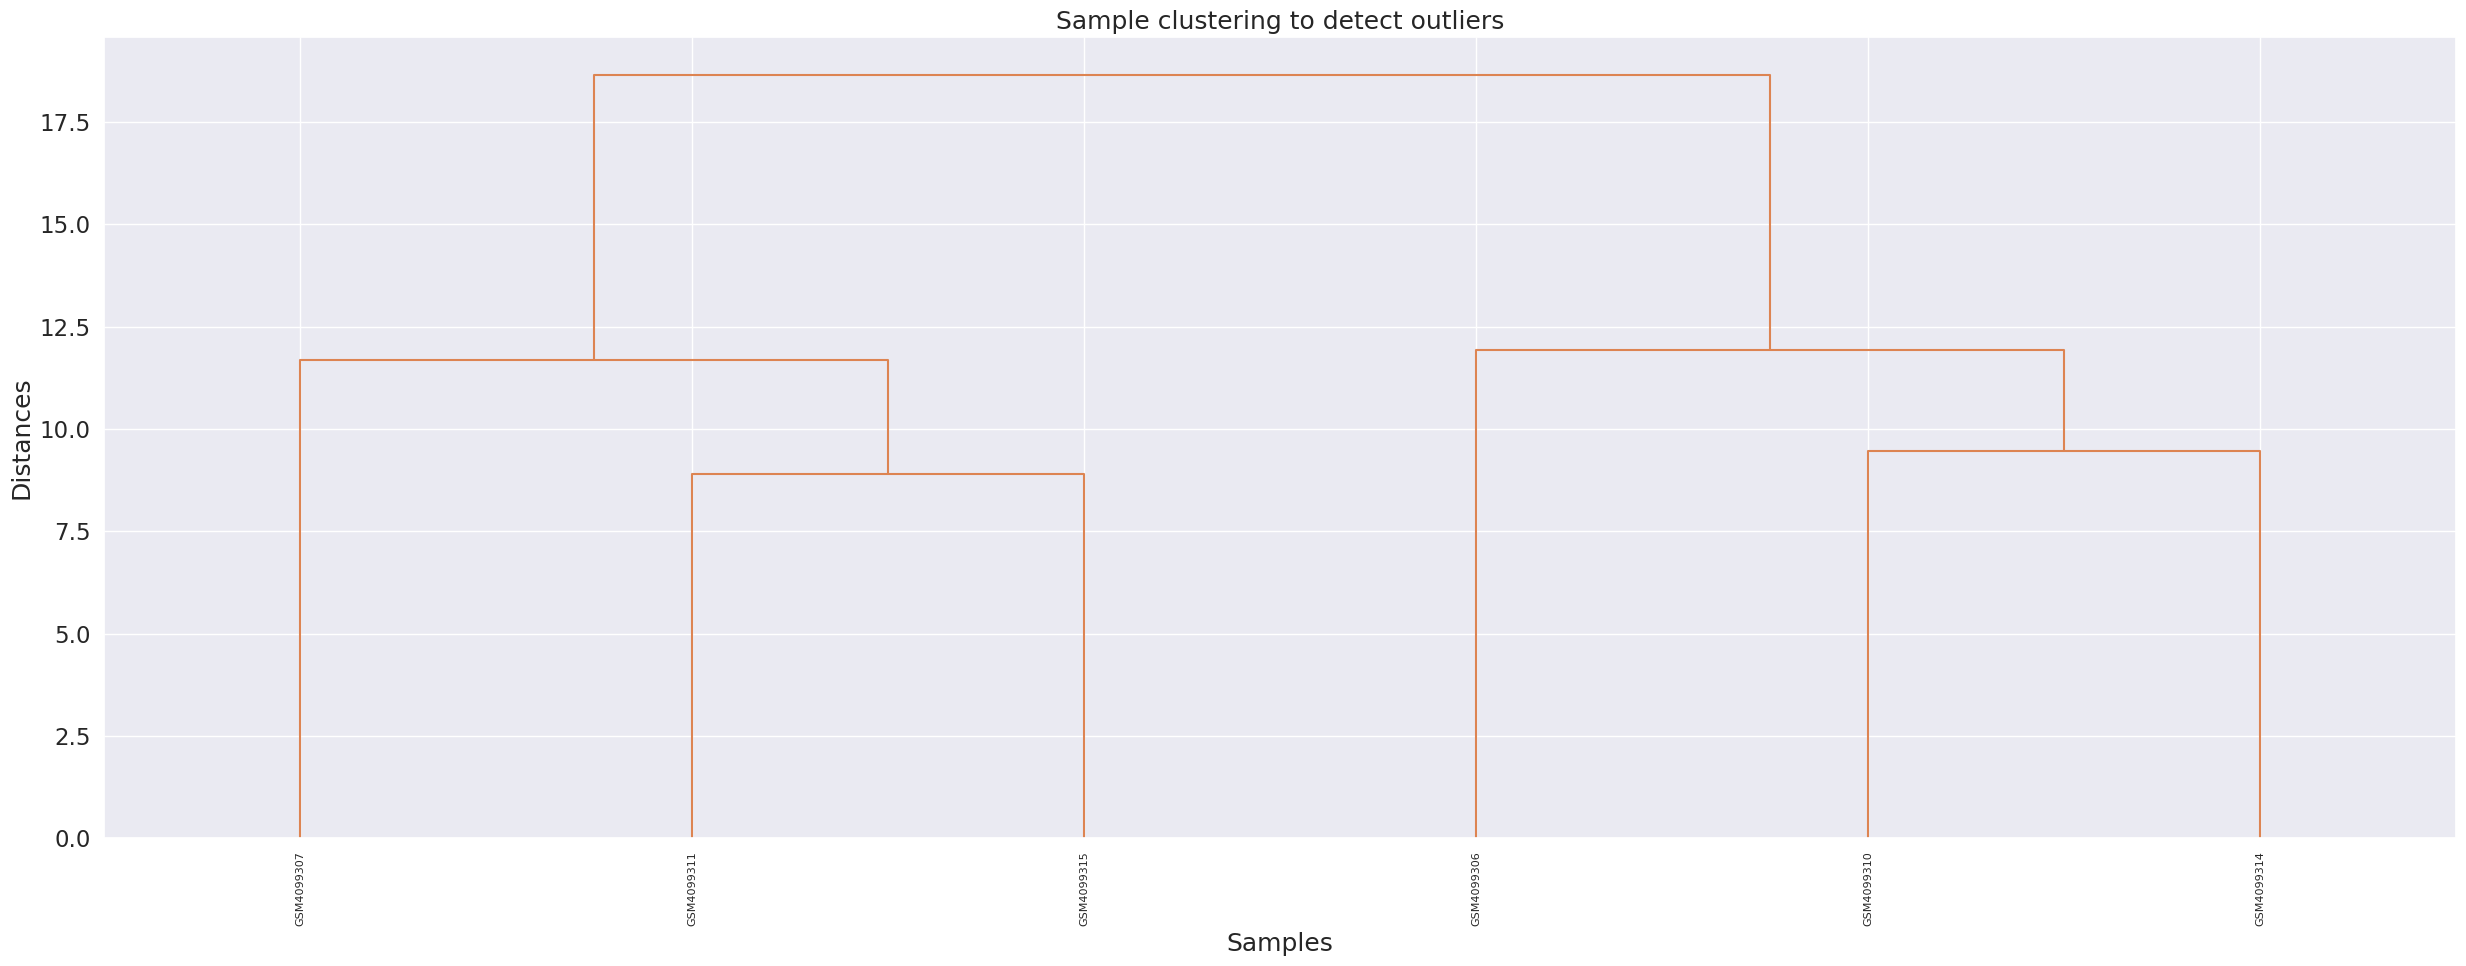

In [256]:
pyWGCNA_reprog.preprocess()

We actually see 6 clusters and that's good because we actually have 6 of them (3 tests + 3 controls). even despite our manipulations everything is preserved

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  4887
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.027738 -0.277195       0.648746  1963.303572  1936.968133   
1       2  0.563199 -0.946633       0.926464  1139.464314  1089.707093   
2       3  0.801257 -1.174741        0.93682   763.686998   702.356512   
3       4  0.846796 -1.208849       0.932105    556.37511   491.187972   
4       5  0.867605 -1.227577       0.922294    428.11516   367.192105   
5       6  0.890992 -1.241673       0.928538   342.373053   282.441781   
6       7  0.903525 -1.254748       0.926749   281.755645   225.840393   
7       8  0.923882 -1.249566       0.941087   237.049794   184.632483   
8       9  0.945347  -1.24504       0.955669   202.971342   156.310904   
9      10  0.961664 -1.237705       0.967244   176.296355   131.811637   
10     11  0.968329 -1.248997       0.973369   154.958111   112.604892   
11     13

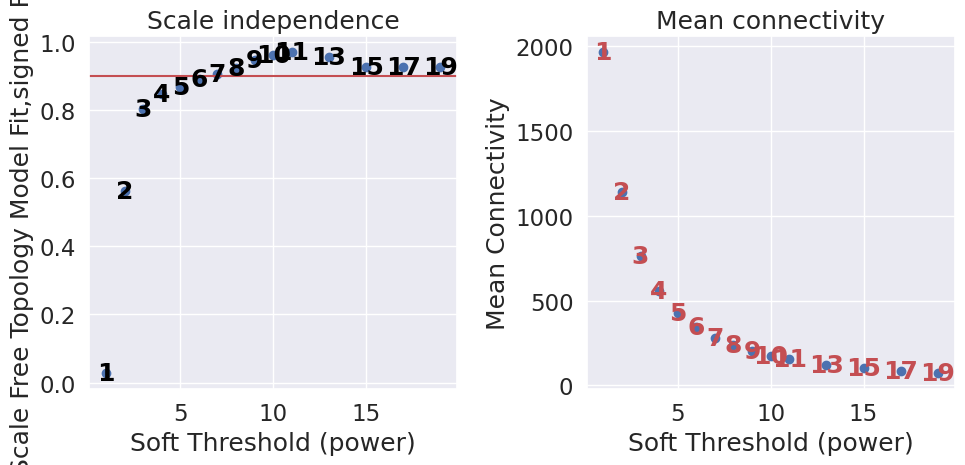

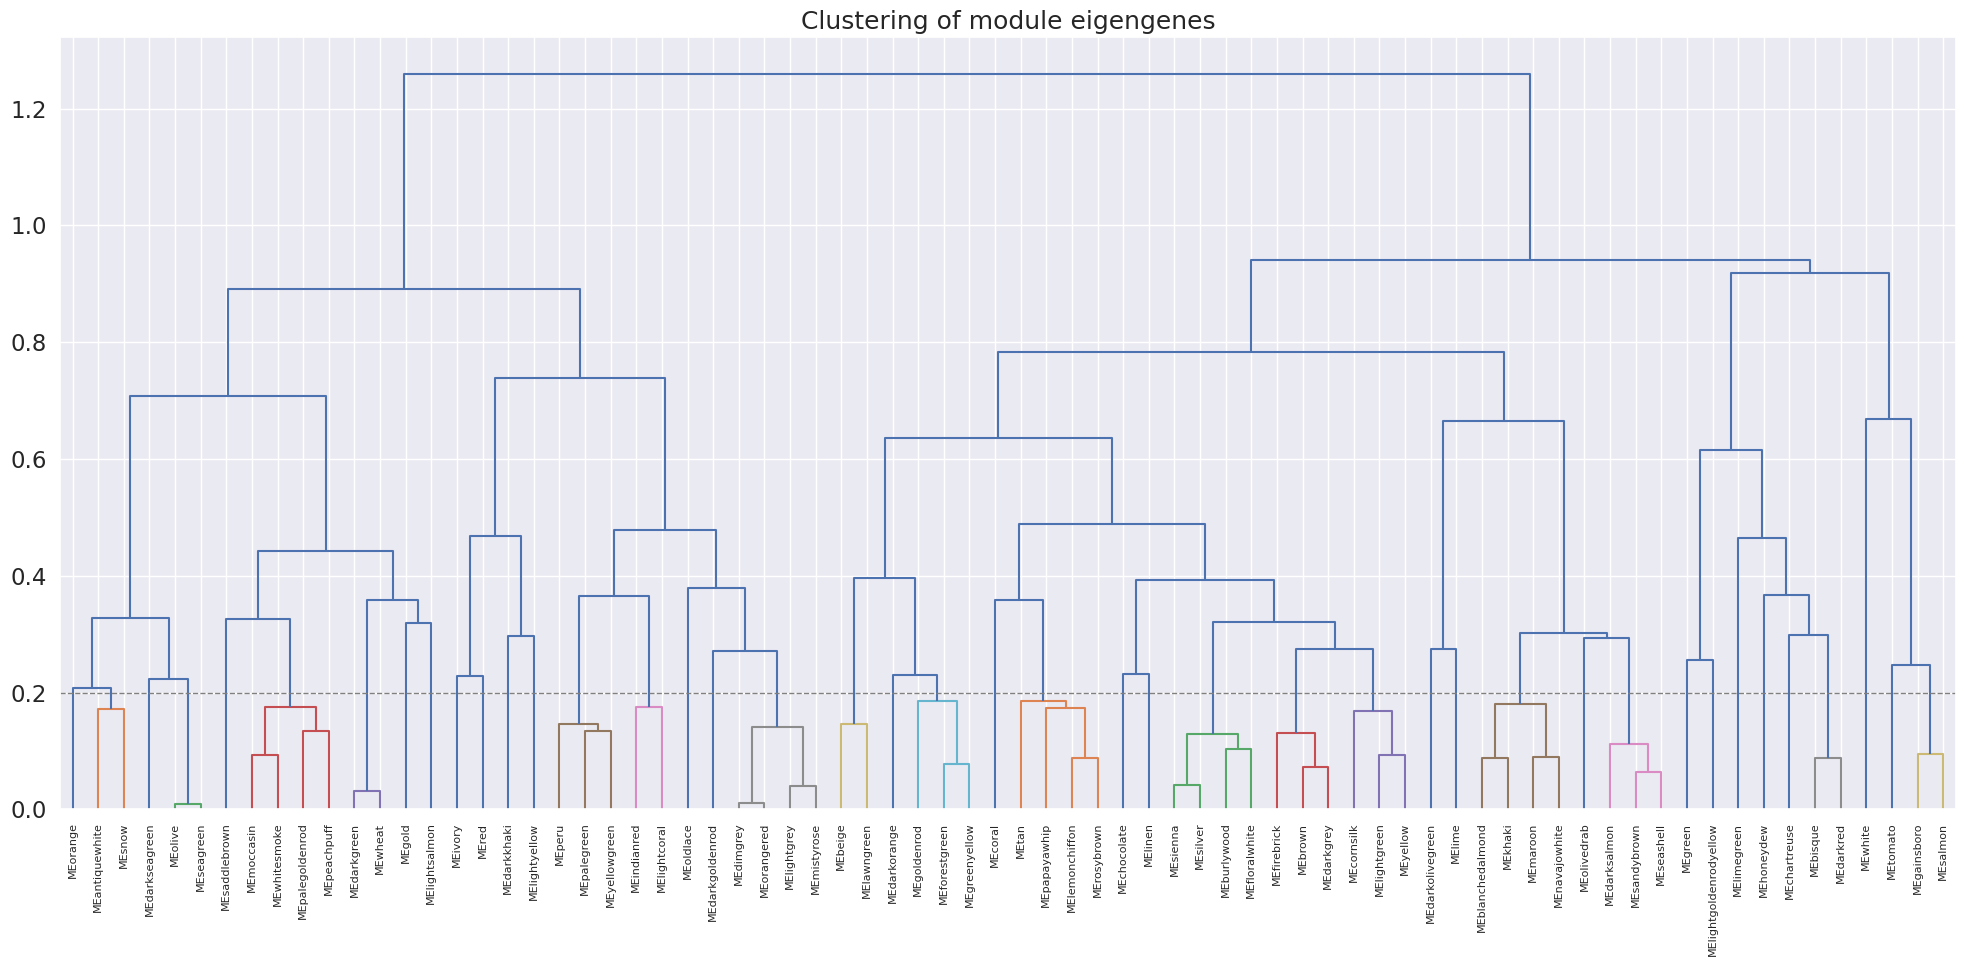

In [257]:
pyWGCNA_reprog.findModules()

insane esoteric sacred step which magically actually found out how to build scale-free network and that is amazing but like why do we even need especially scale-free networks? original paper basically says that well otherwise biologists would wine* (*-see the report) \\
we have multiple modules since we have a lot of genes and that is to be expected. later we will see interesting stuff about one selected module

In [258]:
sample_info_data = {
    'SampleType': ['Test1', 'Test2', 'Test3', 'Control1', 'Control2', 'Control3']
    #'NeuN': ['NeuN-', 'NeuN-', 'NeuN-', 'NeuN+', 'NeuN+', 'NeuN+']
}

sample_info_index = ['GSM4099306', 'GSM4099310', 'GSM4099314', 'GSM4099307', 'GSM4099311', 'GSM4099315']
pyWGCNA_reprog.updateSampleInfo(sampleInfo=sample_info)
pyWGCNA_reprog.geneExpr.obs

SampleType
GSM4099306      Test1
GSM4099310      Test2
GSM4099314      Test3
GSM4099307   Control1
GSM4099311   Control2
GSM4099315   Control3

In [259]:
import seaborn as sns

In [260]:
sample_types = pyWGCNA_reprog.geneExpr.obs['SampleType'].unique()
pyWGCNA_reprog.setMetadataColor('SampleType', {sample_types[i]: sns.color_palette('tab10').as_hex()[i] for i in range(len(sample_types))})


we choose color palette with the most absurd namings

In [261]:


gene_info_data = {
    'ensembl_gene_id': sampled_df.columns

}

gene_info_index = sampled_df.columns
gene_info = pd.DataFrame(data=gene_info_data, index=gene_info_index)
gene_types_series = sampled_df1.loc['nearest_gene_biotype']
gene_info['gene_biotype'] = gene_info['ensembl_gene_id'].map(gene_types_series)
gene_names_series = sampled_df1.loc['gene_name']
gene_info['gene_name'] = gene_info['ensembl_gene_id'].map(gene_names_series)


In [262]:


pyWGCNA_reprog.updateGeneInfo(gene_info)


In [263]:
pyWGCNA_reprog.geneExpr.var

ensembl_gene_id          gene_biotype gene_name
nearest_gene_ensembl_id                                                    
ENSMUSG00000114979       ENSMUSG00000114979                lncRNA   Gm31072
ENSMUSG00000082565       ENSMUSG00000082565  processed_pseudogene    Gm5255
ENSMUSG00000093490       ENSMUSG00000093490  processed_pseudogene   Gm19932
ENSMUSG00000105313       ENSMUSG00000105313       IG_V_pseudogene   Gm43583
ENSMUSG00000096019       ENSMUSG00000096019                snoRNA   Gm26504
...                                     ...                   ...       ...
ENSMUSG00000086794       ENSMUSG00000086794                lncRNA   Gm11642
ENSMUSG00000019429       ENSMUSG00000019429        protein_coding     Ffar3
ENSMUSG00000089992       ENSMUSG00000089992        protein_coding     G6pd2
ENSMUSG00000102877       ENSMUSG00000102877                   TEC   Gm38314
ENSMUSG00000080363       ENSMUSG00000080363                 miRNA   Gm25778

[10000 rows x 3 columns]

later we will need all of these columns for GO analysis

In [264]:
pyWGCNA_reprog.saveWGCNA()

Saving WGCNA as reprog_metlevs.p


In [265]:
pyWGCNA_reprog = PyWGCNA.readWGCNA("wgcna_reprog_reprog_metlevs.p")
pyWGCNA_reprog.geneExpr

Reading reprog_metlevs WGCNA done!


AnnData object with n_obs × n_vars = 6 × 10000
    obs: 'SampleType'
    var: 'ensembl_gene_id', 'gene_biotype', 'gene_name'

now for results

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...


StopIteration: 

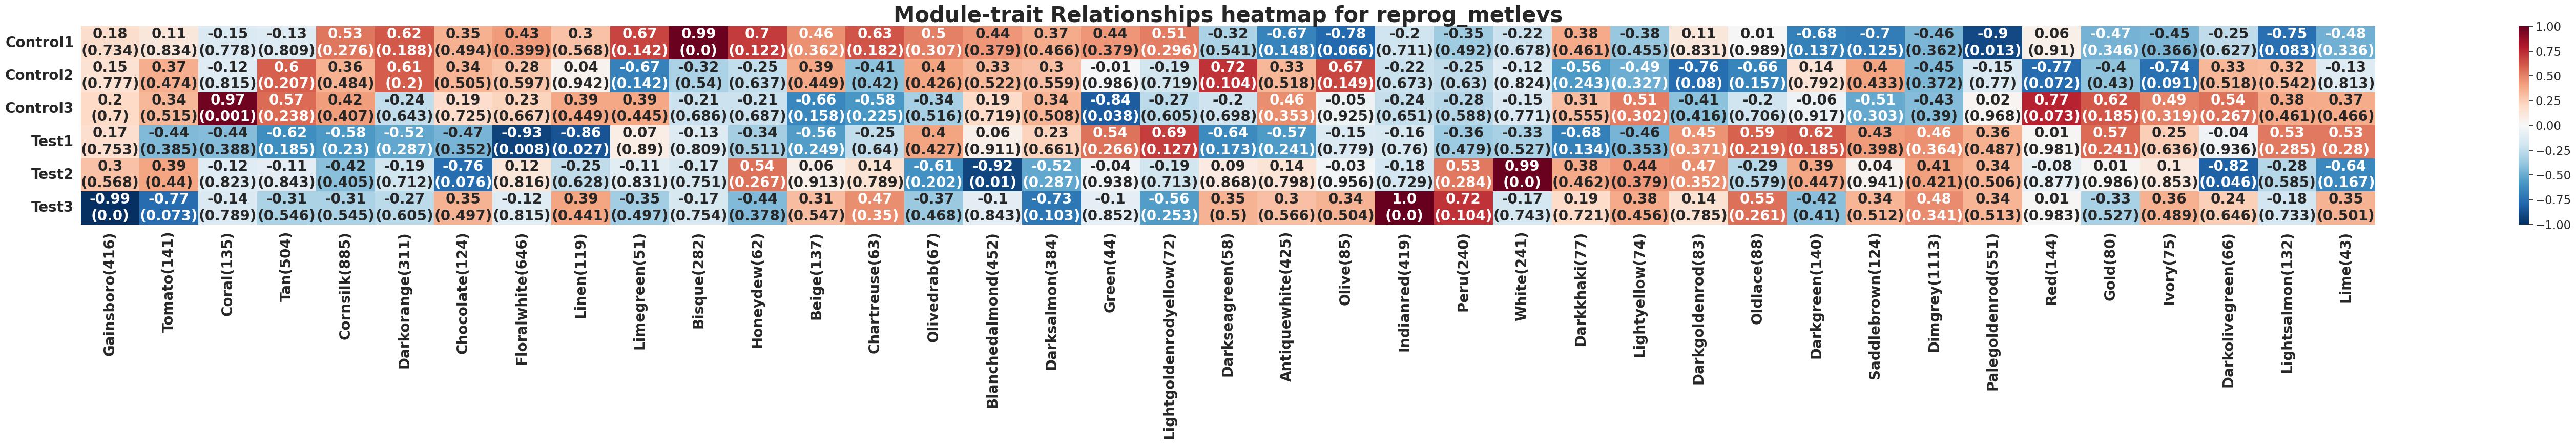

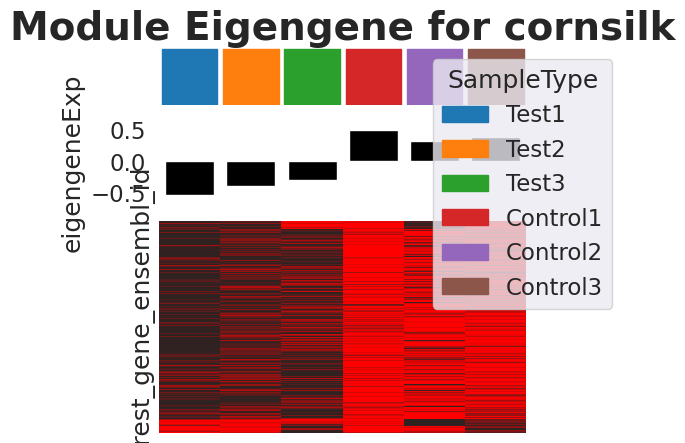

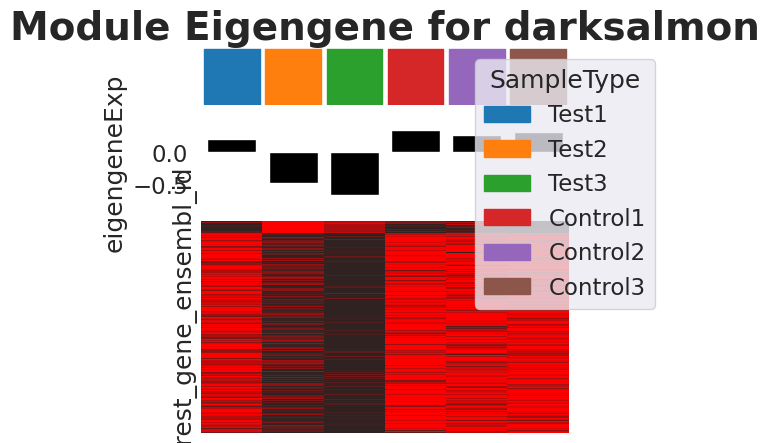

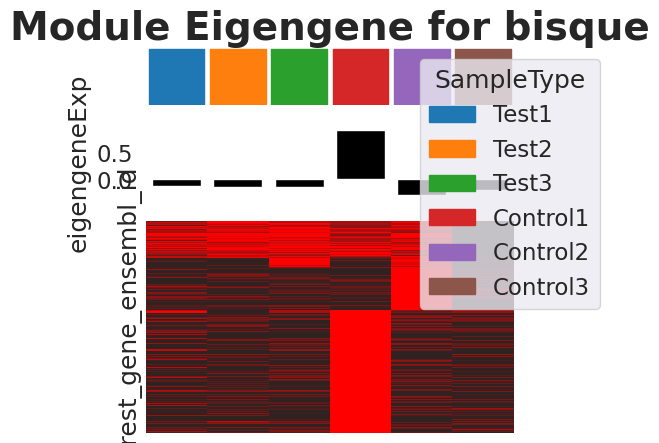

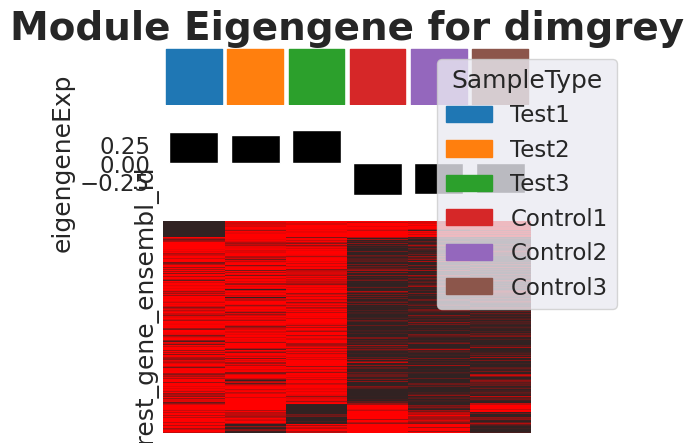

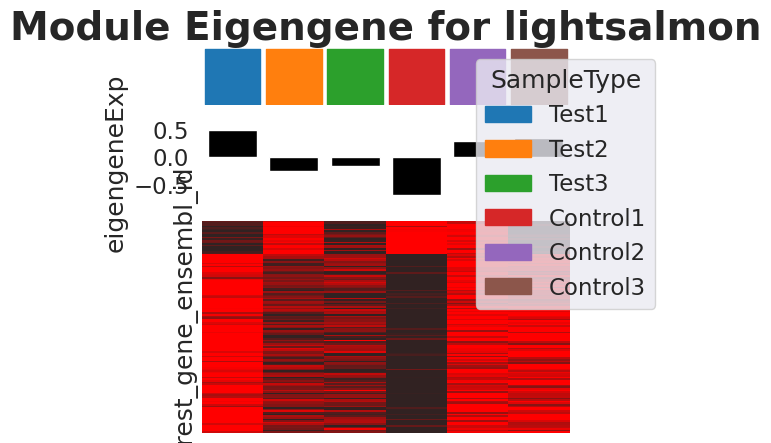

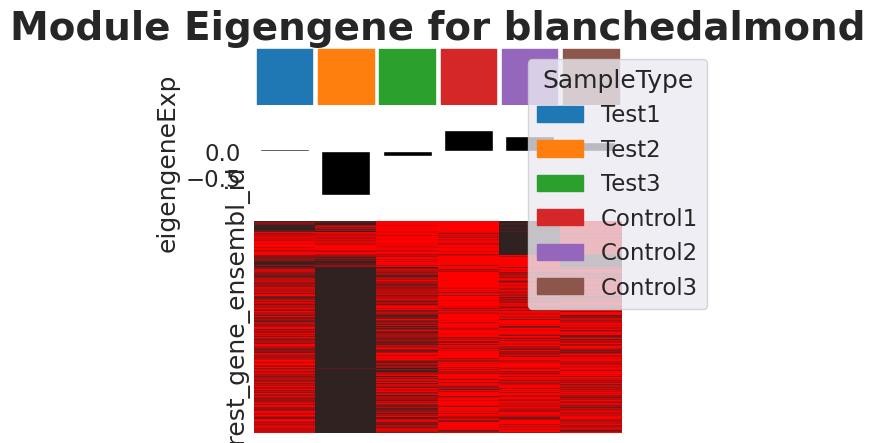

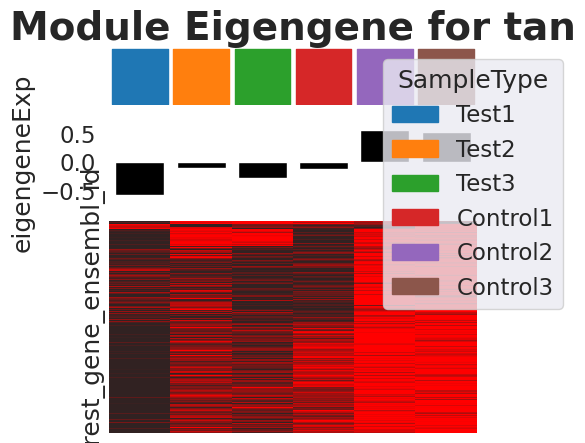

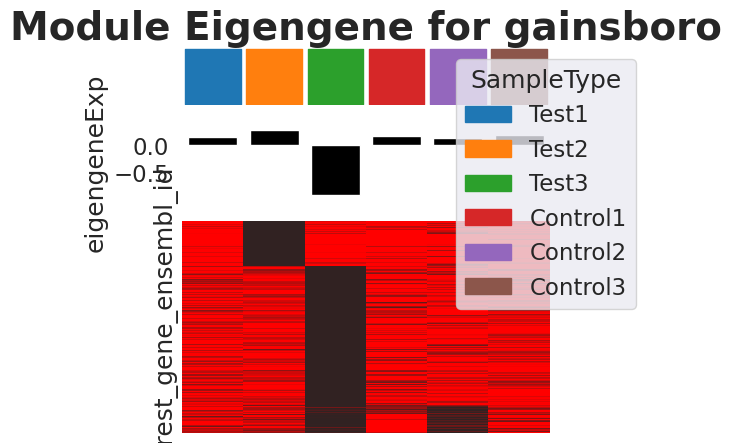

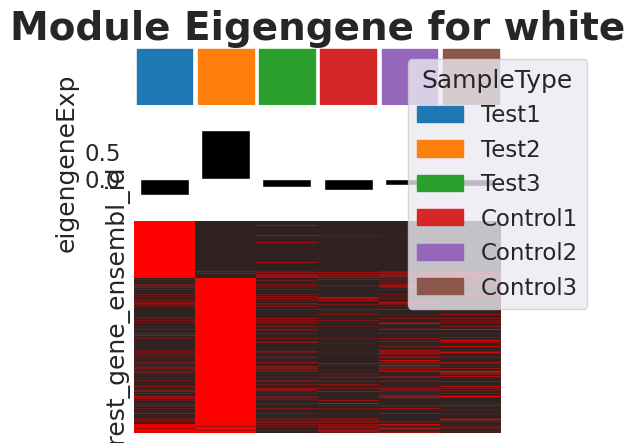

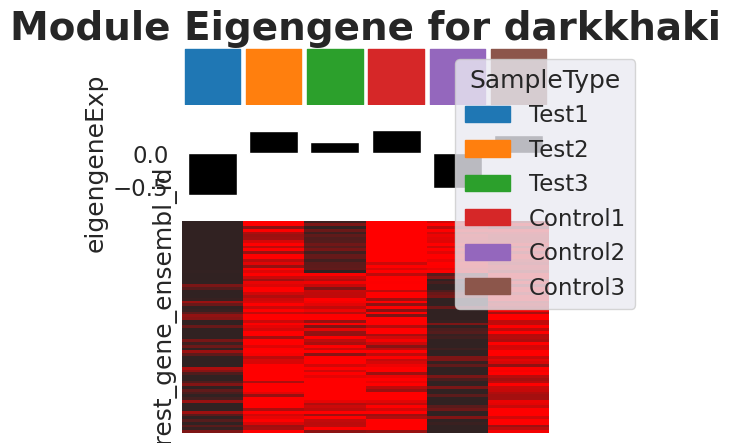

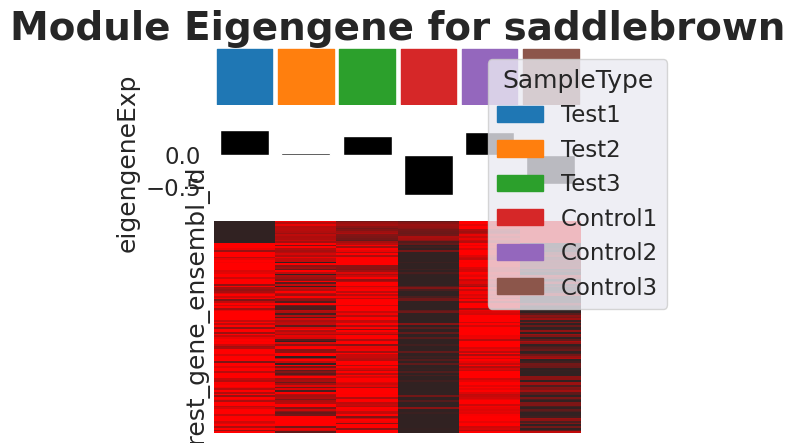

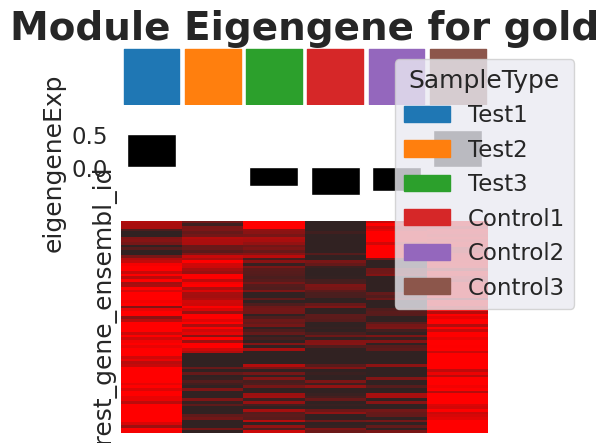

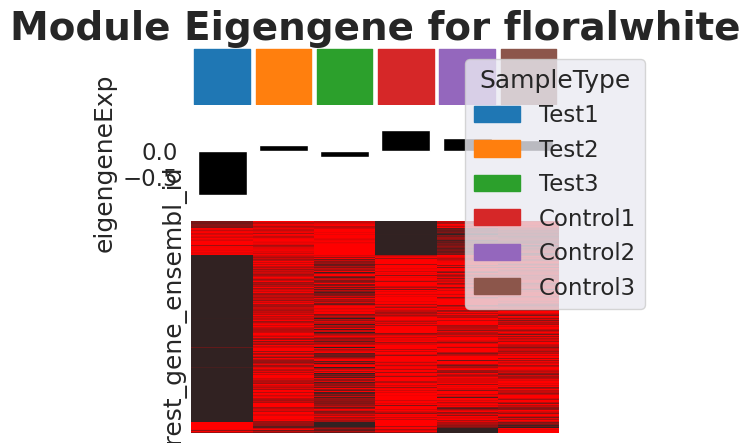

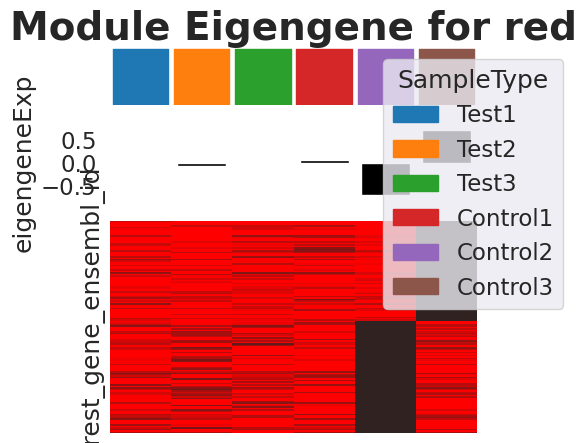

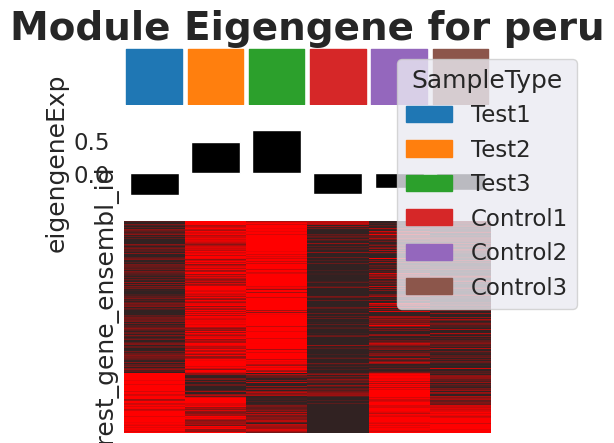

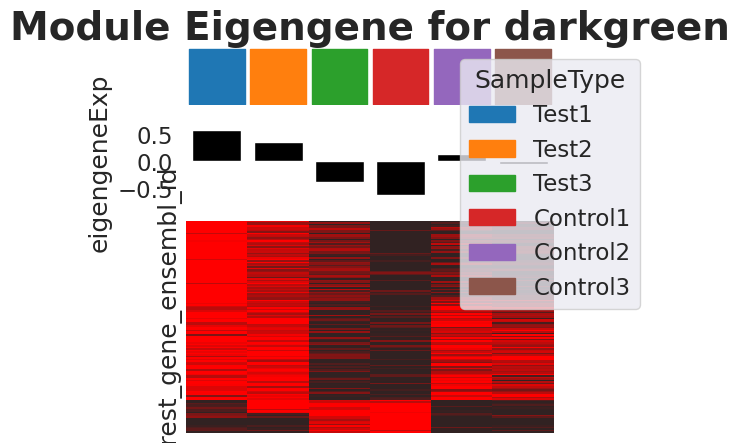

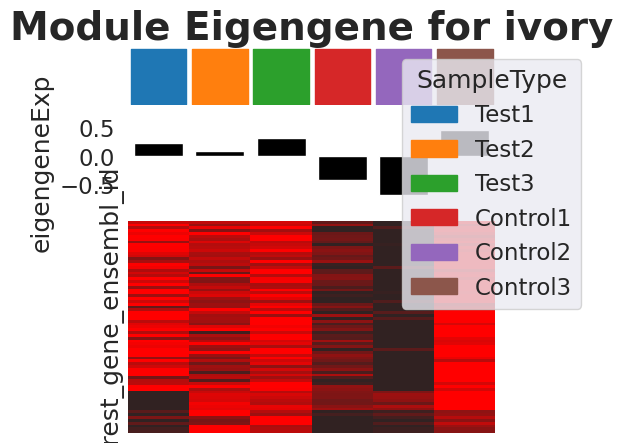

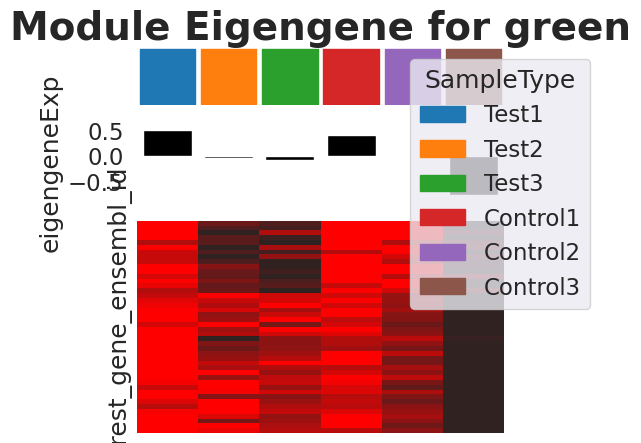

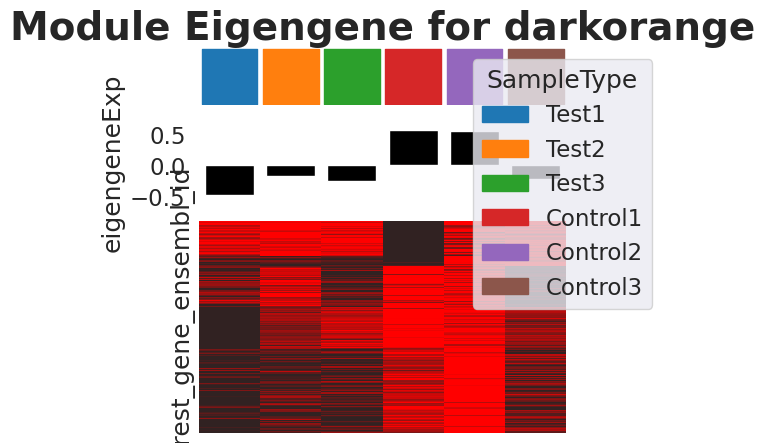

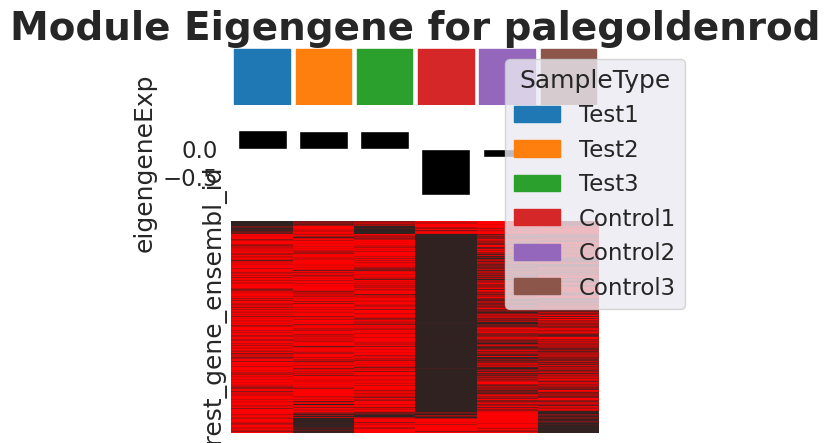

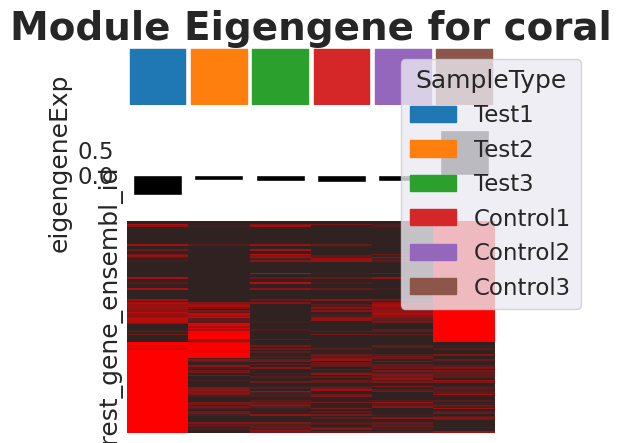

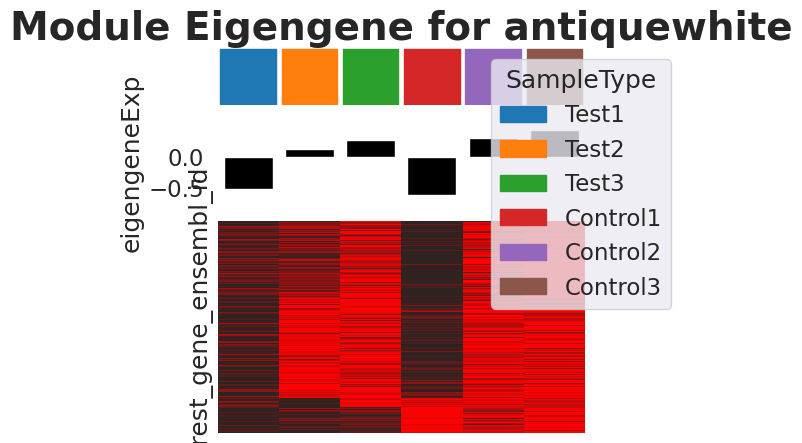

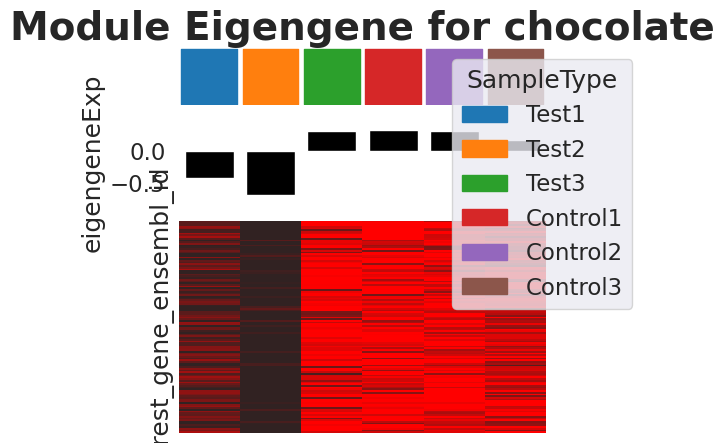

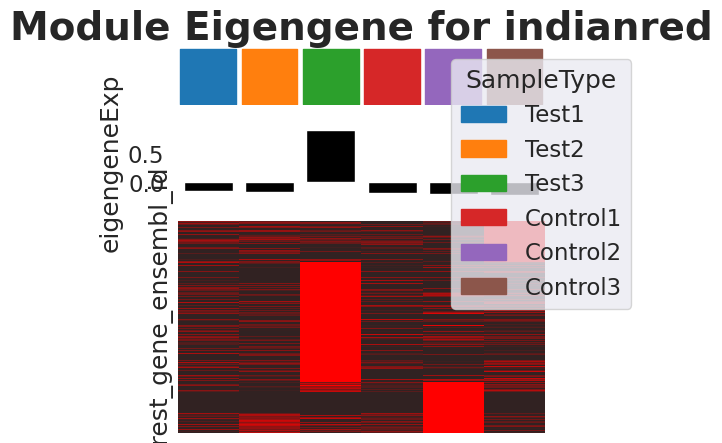

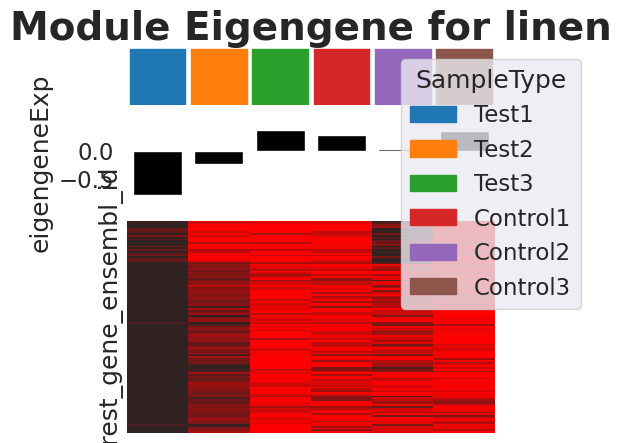

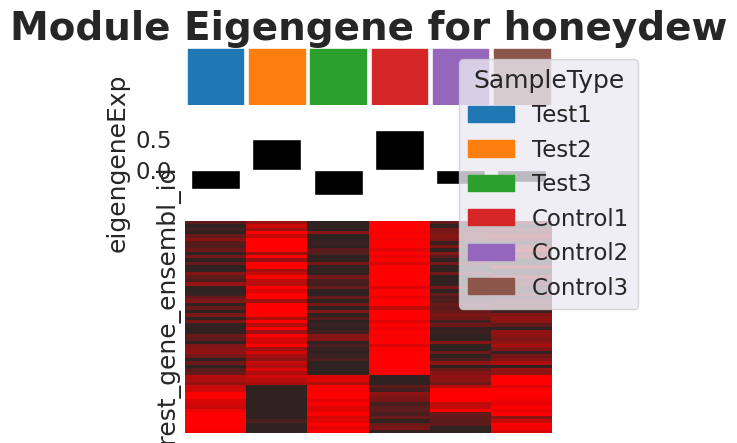

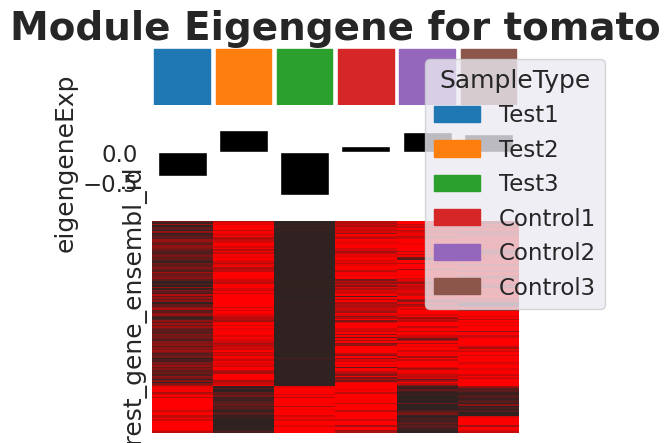

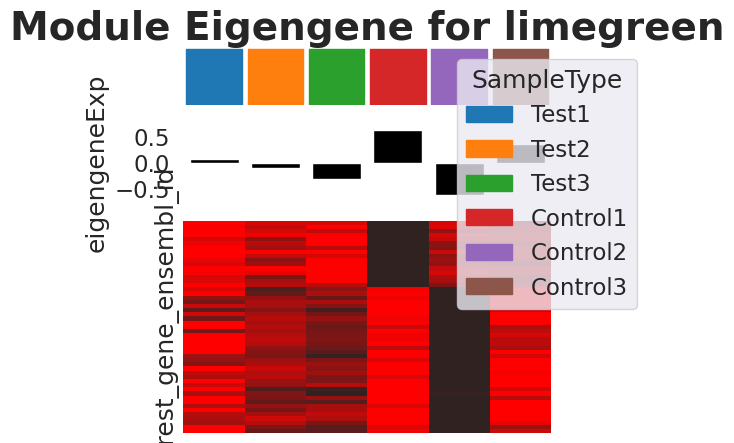

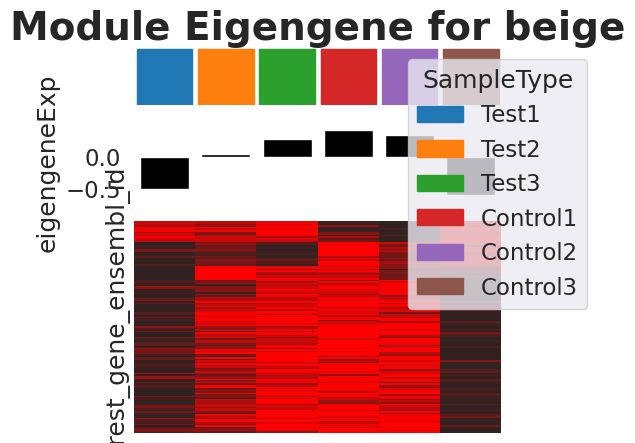

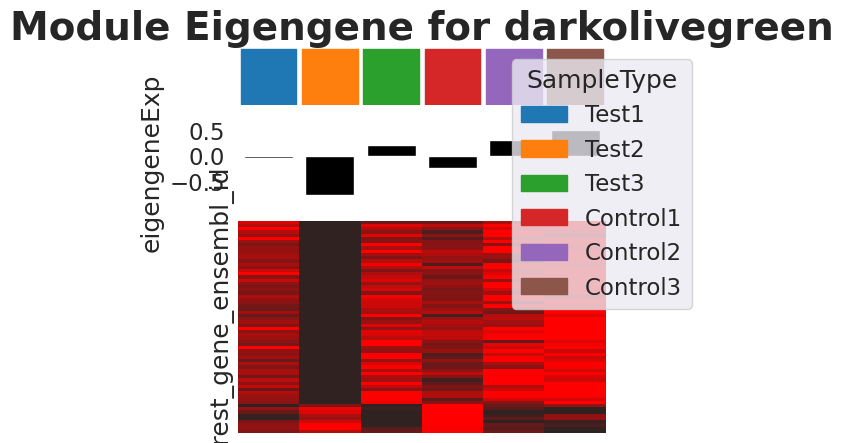

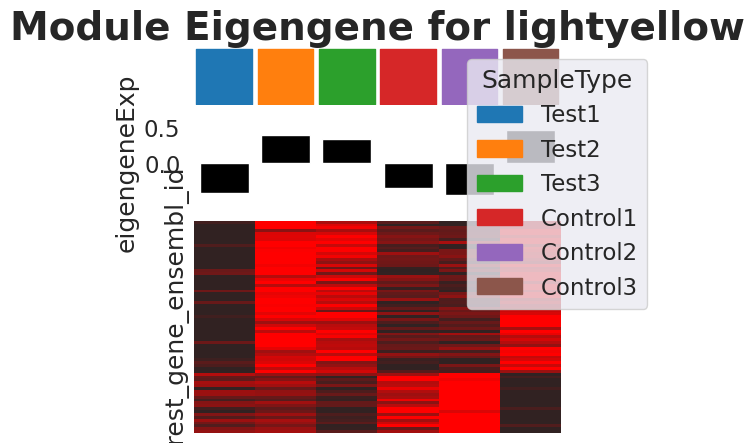

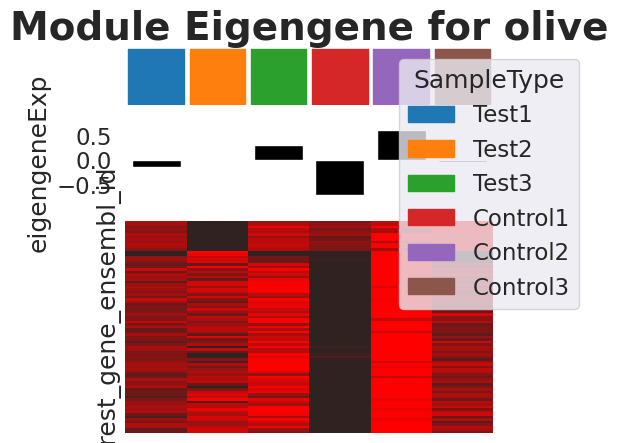

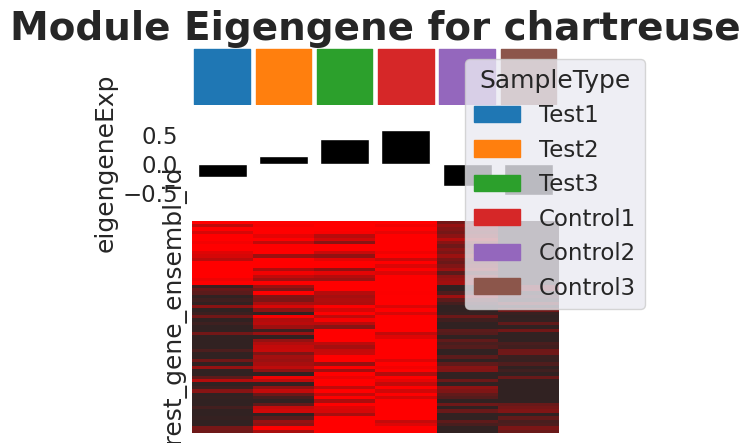

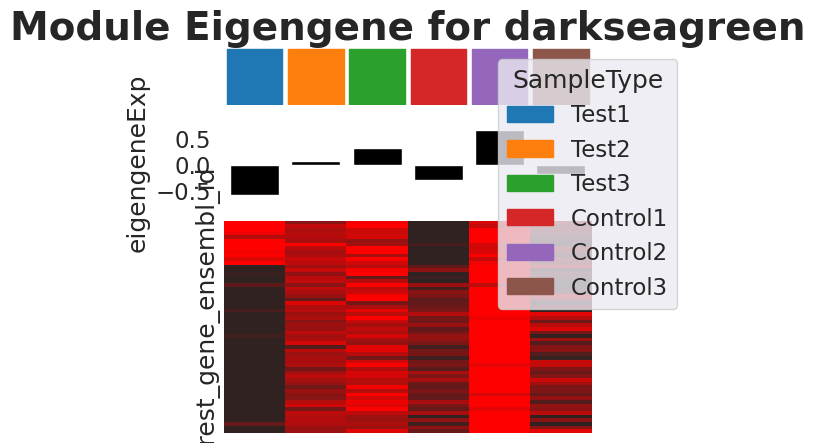

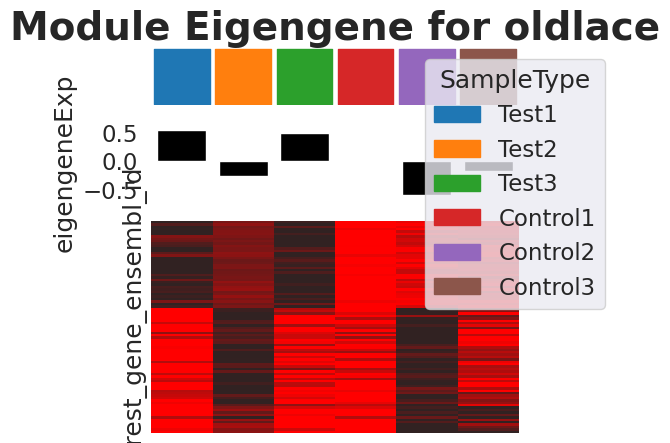

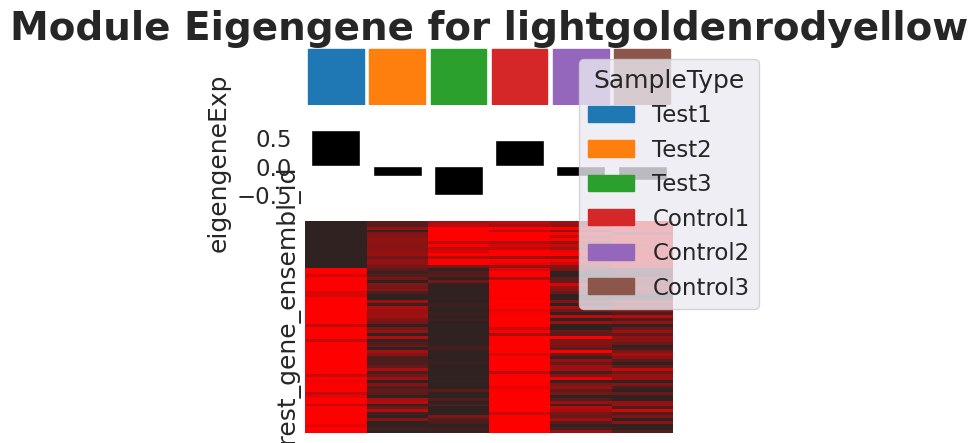

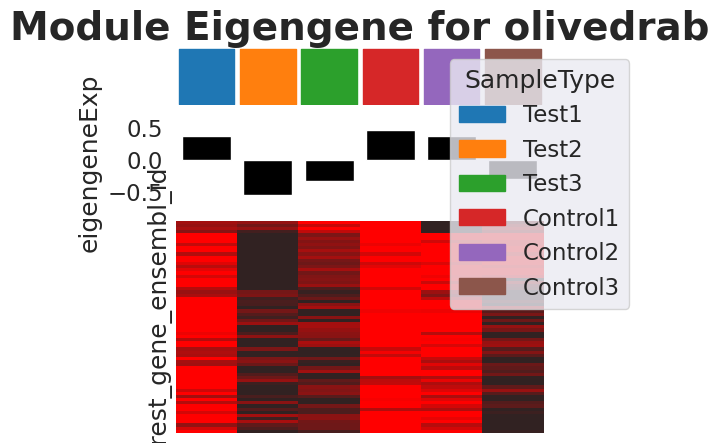

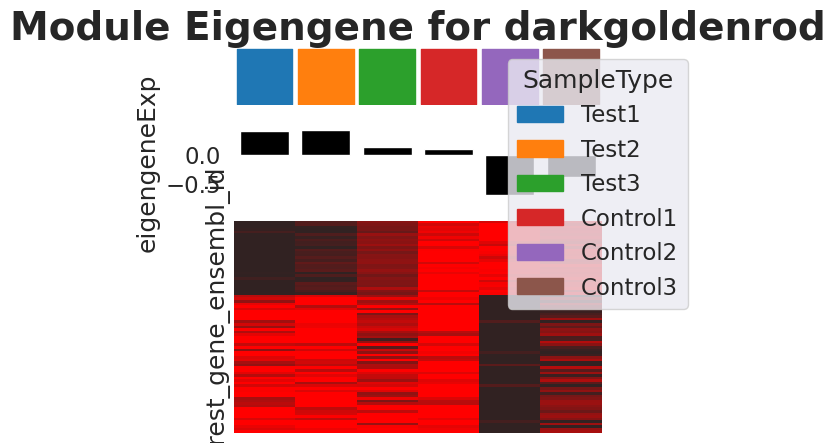

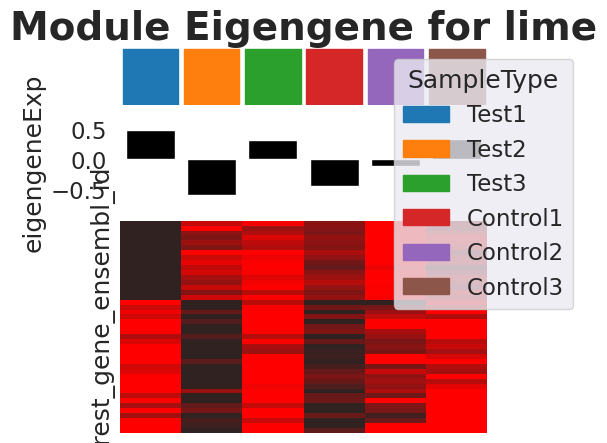

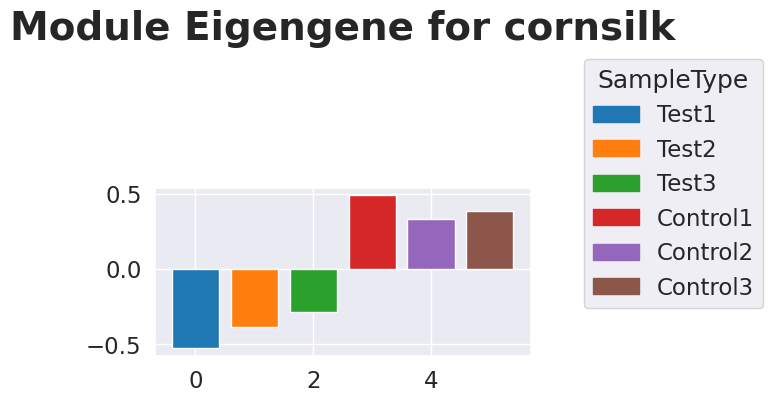

In [266]:
pyWGCNA_reprog.analyseWGCNA()

Adequate modules: cornsilk (who even comes up with these names?), darksalmon, blanchedalmond, dimgrey,gainsboro, floralwhite, peru, palegoldenrod

let's look at some of them

In [267]:
modules = pyWGCNA_reprog.datExpr.var.moduleColors.unique().tolist()

In [268]:
pyWGCNA_reprog.top_n_hub_genes(moduleName=modules[0], n=10)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  \
nearest_gene_ensembl_id                                            
ENSMUSG00000118398         185.707181      cornsilk     cornsilk   
ENSMUSG00000060411         185.322125      cornsilk     cornsilk   
ENSMUSG00000032353         185.285025      cornsilk     cornsilk   
ENSMUSG00000087058         184.970552      cornsilk     cornsilk   
ENSMUSG00000057735         183.158059      cornsilk     cornsilk   
ENSMUSG00000114547         182.771949      cornsilk     cornsilk   
ENSMUSG00000103633         182.397005      cornsilk     cornsilk   
ENSMUSG00000118075         181.979614      cornsilk     cornsilk   
ENSMUSG00000093801         181.649461      cornsilk     cornsilk   
ENSMUSG00000076876         181.568313      cornsilk     cornsilk   

                         moduleLabels     ensembl_gene_id  \
nearest_gene_ensembl_id                                     
ENSMUSG00000118398                7.0  ENSMUSG00000118398   
ENSMUSG00000060411                7.0  ENSMUSG00000060411   
ENSMUSG00000032353                7.0  ENSMUSG00000032353   
ENSMUSG00000087058                7.0  ENSMUSG00000087058   
ENSMUSG00000057735                7.0  ENSMUSG00000057735   
ENSMUSG00000114547                7.0  ENSMUSG00000114547   
ENSMUSG00000103633                7.0  ENSMUSG00000103633   
ENSMUSG00000118075                7.0  ENSMUSG00000118075   
ENSMUSG00000093801                7.0  ENSMUSG00000093801   
ENSMUSG00000076876                7.0  ENSMUSG00000076876   

                                 gene_biotype     gene_name  
nearest_gene_ensembl_id                                      
ENSMUSG00000118398       processed_pseudogene                
ENSMUSG00000060411                     lncRNA          Npn2  
ENSMUSG00000032353             protein_coding         Tmed3  
ENSMUSG00000087058                     lncRNA       Gm12301  
ENSMUSG00000057735             protein_coding  Olfr1185-ps1  
ENSMUSG00000114547       processed_pseudogene        Gm3226  
ENSMUSG00000103633       processed_pseudogene       Gm38328  
ENSMUSG00000118075                     lncRNA                
ENSMUSG00000093801                  TR_V_gene     Trav14n-2  
ENSMUSG00000076876                  TR_J_gene        Traj57

In [269]:
pyWGCNA_reprog.top_n_hub_genes(moduleName=modules[1], n=10)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  \
nearest_gene_ensembl_id                                            
ENSMUSG00000076477          87.730566    darksalmon   darksalmon   
ENSMUSG00000083579          87.244611    darksalmon   darksalmon   
ENSMUSG00000086202          85.563257    darksalmon   darksalmon   
ENSMUSG00000083168          83.483709    darksalmon   darksalmon   
ENSMUSG00000017344          83.479426    darksalmon   darksalmon   
ENSMUSG00000093461          83.321359    darksalmon   darksalmon   
ENSMUSG00000077241          83.227333    darksalmon   darksalmon   
ENSMUSG00000096335          82.836643    darksalmon   darksalmon   
ENSMUSG00000048261          82.804715    darksalmon   darksalmon   
ENSMUSG00000104664          82.169205    darksalmon   darksalmon   

                         moduleLabels     ensembl_gene_id  \
nearest_gene_ensembl_id                                     
ENSMUSG00000076477               13.0  ENSMUSG00000076477   
ENSMUSG00000083579               13.0  ENSMUSG00000083579   
ENSMUSG00000086202               13.0  ENSMUSG00000086202   
ENSMUSG00000083168               13.0  ENSMUSG00000083168   
ENSMUSG00000017344               13.0  ENSMUSG00000017344   
ENSMUSG00000093461               13.0  ENSMUSG00000093461   
ENSMUSG00000077241               13.0  ENSMUSG00000077241   
ENSMUSG00000096335               13.0  ENSMUSG00000096335   
ENSMUSG00000048261               13.0  ENSMUSG00000048261   
ENSMUSG00000104664               13.0  ENSMUSG00000104664   

                                   gene_biotype      gene_name  
nearest_gene_ensembl_id                                         
ENSMUSG00000076477                    TR_V_gene         Trbv21  
ENSMUSG00000083579         processed_pseudogene        Gm15538  
ENSMUSG00000086202                       lncRNA  1700019E08Rik  
ENSMUSG00000083168         processed_pseudogene        Gm14201  
ENSMUSG00000017344               protein_coding            Vtn  
ENSMUSG00000093461       unprocessed_pseudogene     Vmn1r-ps21  
ENSMUSG00000077241                       snoRNA        Gm23272  
ENSMUSG00000096335                         rRNA       n-R5s108  
ENSMUSG00000048261         processed_pseudogene         Gm4879  
ENSMUSG00000104664         processed_pseudogene        Gm35570

In [271]:
pyWGCNA_reprog.top_n_hub_genes(moduleName=modules[3], n=10)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  \
nearest_gene_ensembl_id                                            
ENSMUSG00000114604         291.515446       dimgrey      dimgrey   
ENSMUSG00000111332         291.193796       dimgrey      dimgrey   
ENSMUSG00000099737         290.608919       dimgrey      dimgrey   
ENSMUSG00000111722         289.704989       dimgrey      dimgrey   
ENSMUSG00000107397         288.710215       dimgrey      dimgrey   
ENSMUSG00000084792         287.907354       dimgrey      dimgrey   
ENSMUSG00000080855         287.415702       dimgrey      dimgrey   
ENSMUSG00000045022         287.152470       dimgrey      dimgrey   
ENSMUSG00000088911         286.698304       dimgrey      dimgrey   
ENSMUSG00000082192         285.578753       dimgrey      dimgrey   

                         moduleLabels     ensembl_gene_id  \
nearest_gene_ensembl_id                                     
ENSMUSG00000114604               15.0  ENSMUSG00000114604   
ENSMUSG00000111332               15.0  ENSMUSG00000111332   
ENSMUSG00000099737               15.0  ENSMUSG00000099737   
ENSMUSG00000111722               15.0  ENSMUSG00000111722   
ENSMUSG00000107397               15.0  ENSMUSG00000107397   
ENSMUSG00000084792               15.0  ENSMUSG00000084792   
ENSMUSG00000080855               15.0  ENSMUSG00000080855   
ENSMUSG00000045022               15.0  ENSMUSG00000045022   
ENSMUSG00000088911               15.0  ENSMUSG00000088911   
ENSMUSG00000082192               15.0  ENSMUSG00000082192   

                                 gene_biotype      gene_name  
nearest_gene_ensembl_id                                       
ENSMUSG00000114604                     lncRNA  2010203P06Rik  
ENSMUSG00000111332                        TEC        Gm38345  
ENSMUSG00000099737                     lncRNA        Gm29655  
ENSMUSG00000111722                     lncRNA        Gm47270  
ENSMUSG00000107397                        TEC  4930402H05Rik  
ENSMUSG00000084792                     lncRNA  1700056N10Rik  
ENSMUSG00000080855       processed_pseudogene      Rpl35-ps1  
ENSMUSG00000045022             protein_coding  1700024P04Rik  
ENSMUSG00000088911                     snoRNA        Gm22609  
ENSMUSG00000082192       processed_pseudogene        Gm14719

In [273]:
pyWGCNA_reprog.top_n_hub_genes(moduleName=modules[5], n=10)

calculating adjacency matrix ...
	Done..



connectivity   dynamicColors    moduleColors  \
nearest_gene_ensembl_id                                                 
ENSMUSG00000082776          59.226092  blanchedalmond  blanchedalmond   
ENSMUSG00000112062          58.878169  blanchedalmond  blanchedalmond   
ENSMUSG00000089413          58.670159  blanchedalmond  blanchedalmond   
ENSMUSG00000091741          57.700896  blanchedalmond  blanchedalmond   
ENSMUSG00000116938          57.680505  blanchedalmond  blanchedalmond   
ENSMUSG00000100230          57.622057  blanchedalmond  blanchedalmond   
ENSMUSG00000104216          56.100681  blanchedalmond  blanchedalmond   
ENSMUSG00000088380          55.889751  blanchedalmond  blanchedalmond   
ENSMUSG00000100451          55.077773  blanchedalmond  blanchedalmond   
ENSMUSG00000117499          54.196474  blanchedalmond  blanchedalmond   

                         moduleLabels     ensembl_gene_id  \
nearest_gene_ensembl_id                                     
ENSMUSG00000082776                3.0  ENSMUSG00000082776   
ENSMUSG00000112062                3.0  ENSMUSG00000112062   
ENSMUSG00000089413                3.0  ENSMUSG00000089413   
ENSMUSG00000091741                3.0  ENSMUSG00000091741   
ENSMUSG00000116938                3.0  ENSMUSG00000116938   
ENSMUSG00000100230                3.0  ENSMUSG00000100230   
ENSMUSG00000104216                3.0  ENSMUSG00000104216   
ENSMUSG00000088380                3.0  ENSMUSG00000088380   
ENSMUSG00000100451                3.0  ENSMUSG00000100451   
ENSMUSG00000117499                3.0  ENSMUSG00000117499   

                                   gene_biotype gene_name  
nearest_gene_ensembl_id                                    
ENSMUSG00000082776         processed_pseudogene    Gm7061  
ENSMUSG00000112062                          TEC   Gm47353  
ENSMUSG00000089413                        snRNA   Gm22013  
ENSMUSG00000091741       unprocessed_pseudogene   Gm17161  
ENSMUSG00000116938         processed_pseudogene   Gm49645  
ENSMUSG00000100230         processed_pseudogene   Gm28650  
ENSMUSG00000104216                          TEC   Gm37987  
ENSMUSG00000088380                        snRNA   Gm24686  
ENSMUSG00000100451                       lncRNA   Gm29665  
ENSMUSG00000117499                          TEC   Gm50010

In [274]:
pyWGCNA_reprog.datExpr.var.moduleColors.value_counts()

moduleColors
dimgrey                 1113
cornsilk                 885
floralwhite              646
palegoldenrod            551
tan                      504
blanchedalmond           452
antiquewhite             425
indianred                419
gainsboro                416
darksalmon               384
darkorange               311
bisque                   282
white                    241
peru                     240
red                      144
tomato                   141
darkgreen                140
beige                    137
coral                    135
lightsalmon              132
chocolate                124
saddlebrown              124
linen                    119
oldlace                   88
olive                     85
darkgoldenrod             83
gold                      80
darkkhaki                 77
ivory                     75
lightyellow               74
lightgoldenrodyellow      72
olivedrab                 67
darkolivegreen            66
chartreuse                63
h

In [275]:
moduleName = 'dimgrey'
pyWGCNA_reprog.figureType = "png"
gene_set_library = ["GO_Biological_Process_2023", "GO_Cellular_Component_2023", "GO_Molecular_Function_2023"]
pyWGCNA_reprog.functional_enrichment_analysis(type="GO",
                                                      moduleName=moduleName,
                                                      sets=gene_set_library,
                                                      p_value=1,
                                                      file_name=f"GO_{moduleName}_2023")

In [276]:
pyWGCNA_reprog.CoexpressionModulePlot(modules=[moduleName], numGenes=10, numConnections=100, minTOM=0)

Network directory does not exist!
Creating network directory!


In [277]:
filters = {"gene_biotype": ["protein_coding"]}
pyWGCNA_reprog.CoexpressionModulePlot(modules=[moduleName], filters=filters, file_name=f"{moduleName}_protein_coding")

In [278]:
moduleName = 'darksalmon'
pyWGCNA_reprog.figureType = "png"
gene_set_library = ["GO_Biological_Process_2023", "GO_Cellular_Component_2023", "GO_Molecular_Function_2023"]
pyWGCNA_reprog.functional_enrichment_analysis(type="GO",
                                                      moduleName=moduleName,
                                                      sets=gene_set_library,
                                                      p_value=1,
                                                      file_name=f"GO_{moduleName}_2023")

In [279]:
pyWGCNA_reprog.CoexpressionModulePlot(modules=[moduleName], numGenes=10, numConnections=100, minTOM=0)

In [280]:
filters = {"gene_biotype": ["protein_coding"]}
pyWGCNA_reprog.CoexpressionModulePlot(modules=[moduleName], filters=filters, file_name=f"{moduleName}_protein_coding")

we looked only at 2 modules out of those that show some obvious changes in methylation, so later we can analyze all of the remaining ones. Still, it seems that we can actually after some manipulations apply wgcna even to data as raw as the one represented here. Coexpression module plots might show interesting correlations between different genes. \\
For example, from darksalmon we see interesting thing that Trmt12 which is responsible for hyper tRNA modification wybutosine synthesis is correlated with potenital odorant receptor Olfr470 and anion transporter Mfsd10 which together also make up an interesting connection. Also, interesting gene in this module is Spag4 which is involved in spermatogenesis. \\
There is a lot to uncover but I hope this will do just fine.